In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3041,3044,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.12,0.77,0.96,...,1.30,53.30,5.31,44.57,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3042,3045,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,7.55,0.15,0.53,...,0.67,60.11,3.33,16.73,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3043,3046,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.85,4.60,0.57,...,2.19,23.86,2.98,25.16,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram
3044,3047,18.40,84.11,Srikakulam,Polaki,Ambeerupeta,Black soil,8.25,1.46,0.57,...,1.30,9.95,2.21,7.01,0.033558,0.018142,0.197793,0.104857,-0.049817,Paddy/G.gram
3045,3048,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.70,0.69,0.63,...,0.55,70.84,3.23,20.62,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.961472,0.413271,0.463808,14.602640,152.665888,1030.453271,356.135514,32.028154,1.252827,0.981846,54.822523,2.310654,26.856519,0.349418
std,1.173631,0.731511,0.252160,23.214154,172.273904,713.591398,281.083851,72.268100,1.357158,0.624377,57.255940,1.509037,21.778706,0.365580
min,4.740000,0.020000,0.060000,0.450000,16.000000,46.000000,4.000000,0.100000,0.100000,0.100000,2.580000,0.110000,1.650000,0.045823
25%,5.942500,0.130000,0.277500,4.760000,67.000000,617.000000,167.250000,6.220000,0.600000,0.527500,9.942500,1.180000,12.920000,0.178998
50%,6.965000,0.210000,0.420000,9.935000,107.500000,892.500000,283.000000,11.345000,0.900000,0.840000,33.730000,1.970000,20.060000,0.253832
75%,8.080000,0.392500,0.602500,17.795000,178.250000,1192.000000,456.250000,21.610000,1.500000,1.322500,84.330000,3.132500,33.885000,0.436699
max,9.040000,9.250000,2.260000,361.940000,2009.000000,5411.000000,1956.000000,648.540000,21.140000,3.660000,346.180000,9.520000,207.680000,4.107729


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 279,
 'Black Soil': 79,
 'Sandy Loam Soil': 58,
 'Saline Soil': 10,
 'Red Sandy Soil': 2}

<BarContainer object of 5 artists>

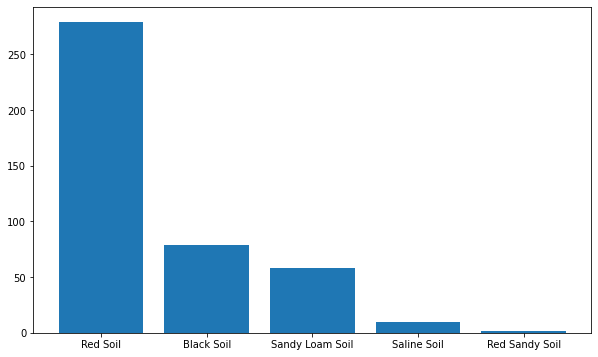

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               50
Maize               38
Coconut             35
banana/coconut      34
Cashew              20
Banana/coconut      17
Banana              11
paddy                7
Maize/paddy          7
Paddy/G.nut          5
maize                5
Paddy Maize          4
Paddy/Ragi           3
banana               3
Cotton/Maize         3
Paddy/Maize          2
cashew               1
coconut              1
Paddy Sugercane      1
paddy                1
coconut/banana       1
Chilli Papaya        1
Maize/Horti          1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 67
Banana + Coconut      52
Maize                 47
Coconut               36
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

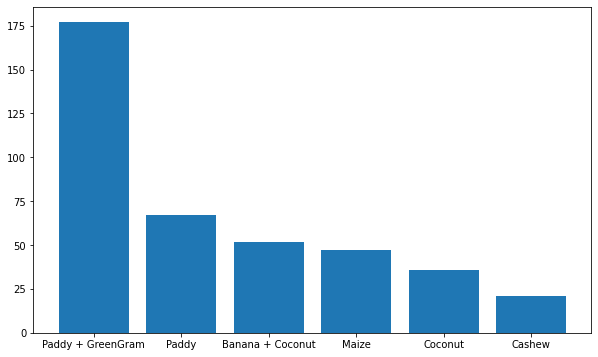

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.036144,-0.173142,0.147631,0.212099,0.088177,0.248197,0.004609,0.056296,0.388219,-0.699983,-0.374378,-0.355627,0.080330
EC,0.036144,1.000000,0.294264,0.103024,0.281155,0.277983,0.345899,0.760315,0.079011,0.392242,-0.047530,0.174227,-0.070442,-0.083744
OC,-0.173142,0.294264,1.000000,0.428003,0.485155,0.535371,0.427264,0.247478,0.505206,0.471484,0.384226,0.686953,0.236073,0.018540
P,0.147631,0.103024,0.428003,1.000000,0.646969,0.158760,0.049023,0.068294,0.582799,0.225287,0.003291,0.053457,-0.047088,0.140461
K,0.212099,0.281155,0.485155,0.646969,1.000000,0.335424,0.288572,0.191091,0.403726,0.426516,-0.102368,0.157180,-0.012947,0.065065
Ca,0.088177,0.277983,0.535371,0.158760,0.335424,1.000000,0.853234,0.200946,0.197035,0.357904,0.143338,0.598291,0.133805,0.022471
Mg,0.248197,0.345899,0.427264,0.049023,0.288572,0.853234,1.000000,0.227618,0.053939,0.596317,-0.014557,0.511157,0.027572,0.002528
S,0.004609,0.760315,0.247478,0.068294,0.191091,0.200946,0.227618,1.000000,0.034358,0.418827,0.036341,0.165831,-0.080504,-0.102573
Zn,0.056296,0.079011,0.505206,0.582799,0.403726,0.197035,0.053939,0.034358,1.000000,0.136258,0.099621,0.169182,0.158456,0.143509
B,0.388219,0.392242,0.471484,0.225287,0.426516,0.357904,0.596317,0.418827,0.136258,1.000000,-0.146109,0.348940,-0.120227,-0.013908


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)


Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'EVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe     Mn       EVI  Black Soil  \
3041  6.12  0.77  0.96  5.62  53.3  44.57  0.243958           1   

      Red Sandy Soil  Red Soil  Saline Soil  Sandy Loam Soil  
3041               0         0            0                0  
3041    Paddy + GreenGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.72


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.33 %
Standard Deviation: 7.34 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.62


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 67.33 %
Standard Deviation: 6.11 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.75


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.67 %
Standard Deviation: 5.58 %


In [36]:
pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state = 0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.00 %
Standard Deviation: 10.05 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7966666666666666
Testing Accuracy:  0.78


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 70.67 %
Standard Deviation: 6.80 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.1252128	total: 155ms	remaining: 15.4s
1:	learn: 0.9809098	total: 156ms	remaining: 7.66s
2:	learn: 0.9241393	total: 157ms	remaining: 5.08s
3:	learn: 0.8360856	total: 158ms	remaining: 3.8s
4:	learn: 0.7546882	total: 159ms	remaining: 3.02s
5:	learn: 0.7311393	total: 160ms	remaining: 2.5s
6:	learn: 0.6936214	total: 160ms	remaining: 2.13s
7:	learn: 0.6770689	total: 161ms	remaining: 1.85s
8:	learn: 0.6570129	total: 162ms	remaining: 1.64s
9:	learn: 0.6263758	total: 163ms	remaining: 1.46s
10:	learn: 0.6044479	total: 163ms	remaining: 1.32s
11:	learn: 0.5943294	total: 164ms	remaining: 1.2s
12:	learn: 0.5731112	total: 165ms	remaining: 1.1s
13:	learn: 0.5583342	total: 165ms	remaining: 1.01s
14:	learn: 0.5486209	total: 166ms	remaining: 940ms
15:	learn: 0.5376298	total: 167ms	remaining: 875ms
16:	learn: 0.5169560	total: 167ms	remaining: 817ms
17:	learn: 0.4957637	total: 168ms	remaining: 765ms
18:	learn: 0.4872244	total: 169ms	remaining: 719ms
19:	learn: 0.4739346	total: 169ms	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.976271261
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9441044225
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9259622862
bestIteration = 99

Training on fold [3/5]

bestTest = 0.9631550222
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9435808754
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7588913	test: 1.7603399	best: 1.7603399 (0)	total: 1.75ms	remaining: 1.75s
1:	learn: 1.7253525	test: 1.7246122	best: 1.7246122 (1)	total: 3.36ms	remaining: 1.68s
2:	learn: 1.6856216	test: 1.6759271	best: 1.6759271 (2)	total: 4.84ms	remaining: 1.61s
3:	learn: 1.6496788	test: 1.6405843	best: 1.6405843 (3)	total: 6.34ms	remaining: 1.58s
4:	learn: 1.6233606	test: 1.6075023	best: 1.6075023 (4)	total: 7.88ms	remaining: 1.57s
5:	learn: 1.5972913	test: 1.5836439	best: 1.5836439 (5)	total: 10.1ms	remaining: 1.67s
6:	learn: 1.5733710	test: 1.5563713	best: 1.5563713 (6)	total: 11.9ms	remaining: 1.69s
7:	learn: 1.5510194	test: 1.5334125	best: 1.5334125 (7)	total: 13.7ms	remaining: 1.69s
8:	learn: 1.5269828	test: 1.5050936	best: 1.5050936 (8)	total: 15.3ms	remaining: 1.69s
9:	learn: 1.5018295	test: 1.4773787	best: 1.4773787 (9)	total: 16.9ms	remaining: 1.67s
10:	learn: 1.4797774	test: 1.4536112	best: 1.4536112 (10)	total: 18.4ms	remaining: 1.66s
11:	learn: 1.4583669	test: 1.4314095	best

105:	learn: 0.7423152	test: 0.7480416	best: 0.7480416 (105)	total: 172ms	remaining: 1.45s
106:	learn: 0.7393543	test: 0.7453636	best: 0.7453636 (106)	total: 174ms	remaining: 1.45s
107:	learn: 0.7366089	test: 0.7432474	best: 0.7432474 (107)	total: 175ms	remaining: 1.45s
108:	learn: 0.7339826	test: 0.7412908	best: 0.7412908 (108)	total: 177ms	remaining: 1.45s
109:	learn: 0.7309828	test: 0.7398384	best: 0.7398384 (109)	total: 179ms	remaining: 1.45s
110:	learn: 0.7286147	test: 0.7371262	best: 0.7371262 (110)	total: 180ms	remaining: 1.44s
111:	learn: 0.7257804	test: 0.7356740	best: 0.7356740 (111)	total: 182ms	remaining: 1.44s
112:	learn: 0.7241446	test: 0.7347619	best: 0.7347619 (112)	total: 183ms	remaining: 1.44s
113:	learn: 0.7214034	test: 0.7327269	best: 0.7327269 (113)	total: 185ms	remaining: 1.44s
114:	learn: 0.7188764	test: 0.7313632	best: 0.7313632 (114)	total: 187ms	remaining: 1.44s
115:	learn: 0.7161511	test: 0.7298537	best: 0.7298537 (115)	total: 189ms	remaining: 1.44s
116:	learn

204:	learn: 0.5536913	test: 0.6427392	best: 0.6427392 (204)	total: 362ms	remaining: 1.4s
205:	learn: 0.5523944	test: 0.6420941	best: 0.6420941 (205)	total: 364ms	remaining: 1.4s
206:	learn: 0.5512665	test: 0.6414347	best: 0.6414347 (206)	total: 365ms	remaining: 1.4s
207:	learn: 0.5494136	test: 0.6400096	best: 0.6400096 (207)	total: 367ms	remaining: 1.4s
208:	learn: 0.5482230	test: 0.6392954	best: 0.6392954 (208)	total: 369ms	remaining: 1.4s
209:	learn: 0.5470911	test: 0.6386125	best: 0.6386125 (209)	total: 371ms	remaining: 1.39s
210:	learn: 0.5456344	test: 0.6376956	best: 0.6376956 (210)	total: 372ms	remaining: 1.39s
211:	learn: 0.5435335	test: 0.6379997	best: 0.6376956 (210)	total: 374ms	remaining: 1.39s
212:	learn: 0.5426442	test: 0.6367239	best: 0.6367239 (212)	total: 375ms	remaining: 1.39s
213:	learn: 0.5413791	test: 0.6362292	best: 0.6362292 (213)	total: 377ms	remaining: 1.39s
214:	learn: 0.5393216	test: 0.6350375	best: 0.6350375 (214)	total: 379ms	remaining: 1.38s
215:	learn: 0.5

301:	learn: 0.4472538	test: 0.6014545	best: 0.6014545 (301)	total: 522ms	remaining: 1.21s
302:	learn: 0.4465506	test: 0.6016897	best: 0.6014545 (301)	total: 524ms	remaining: 1.2s
303:	learn: 0.4460083	test: 0.6016089	best: 0.6014545 (301)	total: 525ms	remaining: 1.2s
304:	learn: 0.4453974	test: 0.6015148	best: 0.6014545 (301)	total: 527ms	remaining: 1.2s
305:	learn: 0.4445511	test: 0.6017316	best: 0.6014545 (301)	total: 528ms	remaining: 1.2s
306:	learn: 0.4434704	test: 0.6012396	best: 0.6012396 (306)	total: 530ms	remaining: 1.2s
307:	learn: 0.4423598	test: 0.6013539	best: 0.6012396 (306)	total: 532ms	remaining: 1.19s
308:	learn: 0.4417043	test: 0.6011254	best: 0.6011254 (308)	total: 533ms	remaining: 1.19s
309:	learn: 0.4406110	test: 0.6007257	best: 0.6007257 (309)	total: 535ms	remaining: 1.19s
310:	learn: 0.4398513	test: 0.6006558	best: 0.6006558 (310)	total: 537ms	remaining: 1.19s
311:	learn: 0.4393799	test: 0.6004488	best: 0.6004488 (311)	total: 539ms	remaining: 1.19s
312:	learn: 0.4

404:	learn: 0.3685098	test: 0.5925868	best: 0.5919859 (397)	total: 696ms	remaining: 1.02s
405:	learn: 0.3675102	test: 0.5921199	best: 0.5919859 (397)	total: 699ms	remaining: 1.02s
406:	learn: 0.3671495	test: 0.5921442	best: 0.5919859 (397)	total: 700ms	remaining: 1.02s
407:	learn: 0.3659736	test: 0.5921441	best: 0.5919859 (397)	total: 702ms	remaining: 1.02s
408:	learn: 0.3649801	test: 0.5919773	best: 0.5919773 (408)	total: 704ms	remaining: 1.02s
409:	learn: 0.3647053	test: 0.5919114	best: 0.5919114 (409)	total: 705ms	remaining: 1.01s
410:	learn: 0.3641265	test: 0.5918628	best: 0.5918628 (410)	total: 707ms	remaining: 1.01s
411:	learn: 0.3629066	test: 0.5906586	best: 0.5906586 (411)	total: 709ms	remaining: 1.01s
412:	learn: 0.3623760	test: 0.5905343	best: 0.5905343 (412)	total: 711ms	remaining: 1.01s
413:	learn: 0.3613163	test: 0.5904020	best: 0.5904020 (413)	total: 713ms	remaining: 1.01s
414:	learn: 0.3607322	test: 0.5899468	best: 0.5899468 (414)	total: 714ms	remaining: 1.01s
415:	learn

502:	learn: 0.3141602	test: 0.5836662	best: 0.5827317 (489)	total: 873ms	remaining: 862ms
503:	learn: 0.3133946	test: 0.5837751	best: 0.5827317 (489)	total: 875ms	remaining: 861ms
504:	learn: 0.3130515	test: 0.5834197	best: 0.5827317 (489)	total: 877ms	remaining: 860ms
505:	learn: 0.3125882	test: 0.5833617	best: 0.5827317 (489)	total: 879ms	remaining: 858ms
506:	learn: 0.3117799	test: 0.5826868	best: 0.5826868 (506)	total: 881ms	remaining: 856ms
507:	learn: 0.3114240	test: 0.5824996	best: 0.5824996 (507)	total: 882ms	remaining: 854ms
508:	learn: 0.3109913	test: 0.5820714	best: 0.5820714 (508)	total: 884ms	remaining: 853ms
509:	learn: 0.3106492	test: 0.5823242	best: 0.5820714 (508)	total: 887ms	remaining: 852ms
510:	learn: 0.3101818	test: 0.5820739	best: 0.5820714 (508)	total: 889ms	remaining: 851ms
511:	learn: 0.3100212	test: 0.5822705	best: 0.5820714 (508)	total: 891ms	remaining: 849ms
512:	learn: 0.3092066	test: 0.5821124	best: 0.5820714 (508)	total: 893ms	remaining: 848ms
513:	learn

602:	learn: 0.2721429	test: 0.5777490	best: 0.5775730 (597)	total: 1.05s	remaining: 689ms
603:	learn: 0.2716487	test: 0.5775695	best: 0.5775695 (603)	total: 1.05s	remaining: 687ms
604:	learn: 0.2713829	test: 0.5776209	best: 0.5775695 (603)	total: 1.05s	remaining: 685ms
605:	learn: 0.2708443	test: 0.5778264	best: 0.5775695 (603)	total: 1.05s	remaining: 684ms
606:	learn: 0.2703836	test: 0.5772753	best: 0.5772753 (606)	total: 1.05s	remaining: 682ms
607:	learn: 0.2698846	test: 0.5771612	best: 0.5771612 (607)	total: 1.05s	remaining: 680ms
608:	learn: 0.2697709	test: 0.5771643	best: 0.5771612 (607)	total: 1.06s	remaining: 678ms
609:	learn: 0.2692375	test: 0.5769599	best: 0.5769599 (609)	total: 1.06s	remaining: 676ms
610:	learn: 0.2690849	test: 0.5772238	best: 0.5769599 (609)	total: 1.06s	remaining: 674ms
611:	learn: 0.2684508	test: 0.5773789	best: 0.5769599 (609)	total: 1.06s	remaining: 673ms
612:	learn: 0.2681841	test: 0.5772906	best: 0.5769599 (609)	total: 1.06s	remaining: 671ms
613:	learn

708:	learn: 0.2353056	test: 0.5758274	best: 0.5752745 (703)	total: 1.22s	remaining: 501ms
709:	learn: 0.2350069	test: 0.5761504	best: 0.5752745 (703)	total: 1.22s	remaining: 500ms
710:	learn: 0.2348215	test: 0.5760524	best: 0.5752745 (703)	total: 1.23s	remaining: 498ms
711:	learn: 0.2346167	test: 0.5761883	best: 0.5752745 (703)	total: 1.23s	remaining: 496ms
712:	learn: 0.2343152	test: 0.5759276	best: 0.5752745 (703)	total: 1.23s	remaining: 494ms
713:	learn: 0.2339936	test: 0.5760742	best: 0.5752745 (703)	total: 1.23s	remaining: 493ms
714:	learn: 0.2336473	test: 0.5761759	best: 0.5752745 (703)	total: 1.23s	remaining: 491ms
715:	learn: 0.2334343	test: 0.5763571	best: 0.5752745 (703)	total: 1.23s	remaining: 489ms
716:	learn: 0.2329977	test: 0.5760912	best: 0.5752745 (703)	total: 1.23s	remaining: 487ms
717:	learn: 0.2328455	test: 0.5761953	best: 0.5752745 (703)	total: 1.24s	remaining: 486ms
718:	learn: 0.2326037	test: 0.5763030	best: 0.5752745 (703)	total: 1.24s	remaining: 484ms
719:	learn

810:	learn: 0.2093788	test: 0.5759774	best: 0.5752717 (806)	total: 1.4s	remaining: 326ms
811:	learn: 0.2092855	test: 0.5760056	best: 0.5752717 (806)	total: 1.4s	remaining: 324ms
812:	learn: 0.2090693	test: 0.5762059	best: 0.5752717 (806)	total: 1.4s	remaining: 322ms
813:	learn: 0.2088712	test: 0.5755843	best: 0.5752717 (806)	total: 1.4s	remaining: 321ms
814:	learn: 0.2087441	test: 0.5755392	best: 0.5752717 (806)	total: 1.4s	remaining: 319ms
815:	learn: 0.2084802	test: 0.5753381	best: 0.5752717 (806)	total: 1.41s	remaining: 317ms
816:	learn: 0.2083640	test: 0.5753566	best: 0.5752717 (806)	total: 1.41s	remaining: 315ms
817:	learn: 0.2082473	test: 0.5754432	best: 0.5752717 (806)	total: 1.41s	remaining: 314ms
818:	learn: 0.2080918	test: 0.5754495	best: 0.5752717 (806)	total: 1.41s	remaining: 312ms
819:	learn: 0.2079493	test: 0.5756569	best: 0.5752717 (806)	total: 1.41s	remaining: 311ms
820:	learn: 0.2076965	test: 0.5754695	best: 0.5752717 (806)	total: 1.42s	remaining: 309ms
821:	learn: 0.2

902:	learn: 0.1903189	test: 0.5757988	best: 0.5749858 (839)	total: 1.57s	remaining: 169ms
903:	learn: 0.1901854	test: 0.5760212	best: 0.5749858 (839)	total: 1.57s	remaining: 167ms
904:	learn: 0.1900106	test: 0.5762561	best: 0.5749858 (839)	total: 1.57s	remaining: 165ms
905:	learn: 0.1897519	test: 0.5759898	best: 0.5749858 (839)	total: 1.58s	remaining: 164ms
906:	learn: 0.1895171	test: 0.5762352	best: 0.5749858 (839)	total: 1.58s	remaining: 162ms
907:	learn: 0.1892120	test: 0.5763917	best: 0.5749858 (839)	total: 1.58s	remaining: 160ms
908:	learn: 0.1890171	test: 0.5764403	best: 0.5749858 (839)	total: 1.58s	remaining: 158ms
909:	learn: 0.1888217	test: 0.5764256	best: 0.5749858 (839)	total: 1.58s	remaining: 157ms
910:	learn: 0.1886592	test: 0.5763470	best: 0.5749858 (839)	total: 1.59s	remaining: 155ms
911:	learn: 0.1883672	test: 0.5764895	best: 0.5749858 (839)	total: 1.59s	remaining: 153ms
912:	learn: 0.1881824	test: 0.5766297	best: 0.5749858 (839)	total: 1.59s	remaining: 152ms
913:	learn

13:	learn: 1.0029158	test: 0.9828258	best: 0.9828258 (13)	total: 20.1ms	remaining: 1.42s
14:	learn: 0.9849873	test: 0.9648059	best: 0.9648059 (14)	total: 21.8ms	remaining: 1.43s
15:	learn: 0.9615442	test: 0.9431731	best: 0.9431731 (15)	total: 23.7ms	remaining: 1.46s
16:	learn: 0.9510430	test: 0.9341544	best: 0.9341544 (16)	total: 25.4ms	remaining: 1.47s
17:	learn: 0.9293087	test: 0.9147938	best: 0.9147938 (17)	total: 26.9ms	remaining: 1.47s
18:	learn: 0.9057088	test: 0.9012253	best: 0.9012253 (18)	total: 28.6ms	remaining: 1.48s
19:	learn: 0.8897041	test: 0.8856307	best: 0.8856307 (19)	total: 30.2ms	remaining: 1.48s
20:	learn: 0.8746835	test: 0.8758643	best: 0.8758643 (20)	total: 32.5ms	remaining: 1.51s
21:	learn: 0.8597725	test: 0.8622465	best: 0.8622465 (21)	total: 34.8ms	remaining: 1.55s
22:	learn: 0.8441928	test: 0.8515014	best: 0.8515014 (22)	total: 36.4ms	remaining: 1.54s
23:	learn: 0.8320969	test: 0.8430729	best: 0.8430729 (23)	total: 38.1ms	remaining: 1.55s
24:	learn: 0.8171906	

113:	learn: 0.3770922	test: 0.6108577	best: 0.6102578 (112)	total: 193ms	remaining: 1.5s
114:	learn: 0.3745134	test: 0.6089476	best: 0.6089476 (114)	total: 195ms	remaining: 1.5s
115:	learn: 0.3719499	test: 0.6080773	best: 0.6080773 (115)	total: 197ms	remaining: 1.5s
116:	learn: 0.3692097	test: 0.6086070	best: 0.6080773 (115)	total: 198ms	remaining: 1.5s
117:	learn: 0.3678674	test: 0.6082153	best: 0.6080773 (115)	total: 200ms	remaining: 1.5s
118:	learn: 0.3656470	test: 0.6072163	best: 0.6072163 (118)	total: 202ms	remaining: 1.49s
119:	learn: 0.3631150	test: 0.6077748	best: 0.6072163 (118)	total: 203ms	remaining: 1.49s
120:	learn: 0.3612997	test: 0.6067842	best: 0.6067842 (120)	total: 205ms	remaining: 1.49s
121:	learn: 0.3590438	test: 0.6059203	best: 0.6059203 (121)	total: 207ms	remaining: 1.49s
122:	learn: 0.3576672	test: 0.6059307	best: 0.6059203 (121)	total: 209ms	remaining: 1.49s
123:	learn: 0.3551170	test: 0.6042347	best: 0.6042347 (123)	total: 211ms	remaining: 1.49s
124:	learn: 0.3

231:	learn: 0.2197110	test: 0.5893763	best: 0.5893763 (231)	total: 381ms	remaining: 1.26s
232:	learn: 0.2185162	test: 0.5897908	best: 0.5893763 (231)	total: 383ms	remaining: 1.26s
233:	learn: 0.2180295	test: 0.5893784	best: 0.5893763 (231)	total: 385ms	remaining: 1.26s
234:	learn: 0.2176134	test: 0.5888045	best: 0.5888045 (234)	total: 387ms	remaining: 1.26s
235:	learn: 0.2170118	test: 0.5894301	best: 0.5888045 (234)	total: 389ms	remaining: 1.26s
236:	learn: 0.2159526	test: 0.5903882	best: 0.5888045 (234)	total: 390ms	remaining: 1.26s
237:	learn: 0.2150798	test: 0.5895544	best: 0.5888045 (234)	total: 392ms	remaining: 1.25s
238:	learn: 0.2142823	test: 0.5904872	best: 0.5888045 (234)	total: 393ms	remaining: 1.25s
239:	learn: 0.2135272	test: 0.5912512	best: 0.5888045 (234)	total: 395ms	remaining: 1.25s
240:	learn: 0.2124236	test: 0.5900855	best: 0.5888045 (234)	total: 396ms	remaining: 1.25s
241:	learn: 0.2117293	test: 0.5906755	best: 0.5888045 (234)	total: 398ms	remaining: 1.25s
242:	learn

341:	learn: 0.1530045	test: 0.5912632	best: 0.5871979 (262)	total: 550ms	remaining: 1.06s
342:	learn: 0.1527354	test: 0.5909586	best: 0.5871979 (262)	total: 552ms	remaining: 1.06s
343:	learn: 0.1521309	test: 0.5916271	best: 0.5871979 (262)	total: 554ms	remaining: 1.06s
344:	learn: 0.1519502	test: 0.5918275	best: 0.5871979 (262)	total: 555ms	remaining: 1.05s
345:	learn: 0.1512951	test: 0.5925274	best: 0.5871979 (262)	total: 557ms	remaining: 1.05s
346:	learn: 0.1506958	test: 0.5931398	best: 0.5871979 (262)	total: 559ms	remaining: 1.05s
347:	learn: 0.1500344	test: 0.5932405	best: 0.5871979 (262)	total: 561ms	remaining: 1.05s
348:	learn: 0.1498070	test: 0.5933789	best: 0.5871979 (262)	total: 562ms	remaining: 1.05s
349:	learn: 0.1493867	test: 0.5930417	best: 0.5871979 (262)	total: 564ms	remaining: 1.05s
350:	learn: 0.1491556	test: 0.5930123	best: 0.5871979 (262)	total: 565ms	remaining: 1.04s
351:	learn: 0.1488920	test: 0.5927839	best: 0.5871979 (262)	total: 567ms	remaining: 1.04s
352:	learn

446:	learn: 0.1118100	test: 0.6012074	best: 0.5871979 (262)	total: 720ms	remaining: 891ms
447:	learn: 0.1114759	test: 0.6012602	best: 0.5871979 (262)	total: 722ms	remaining: 890ms
448:	learn: 0.1112769	test: 0.6010003	best: 0.5871979 (262)	total: 724ms	remaining: 888ms
449:	learn: 0.1108543	test: 0.6018608	best: 0.5871979 (262)	total: 726ms	remaining: 887ms
450:	learn: 0.1105769	test: 0.6016430	best: 0.5871979 (262)	total: 727ms	remaining: 885ms
451:	learn: 0.1103954	test: 0.6018881	best: 0.5871979 (262)	total: 729ms	remaining: 884ms
452:	learn: 0.1102657	test: 0.6022375	best: 0.5871979 (262)	total: 730ms	remaining: 882ms
453:	learn: 0.1098389	test: 0.6023609	best: 0.5871979 (262)	total: 732ms	remaining: 880ms
454:	learn: 0.1094506	test: 0.6026483	best: 0.5871979 (262)	total: 734ms	remaining: 879ms
455:	learn: 0.1091791	test: 0.6023578	best: 0.5871979 (262)	total: 736ms	remaining: 878ms
456:	learn: 0.1089663	test: 0.6019568	best: 0.5871979 (262)	total: 738ms	remaining: 876ms
457:	learn

569:	learn: 0.0839193	test: 0.6115882	best: 0.5871979 (262)	total: 906ms	remaining: 684ms
570:	learn: 0.0838047	test: 0.6119779	best: 0.5871979 (262)	total: 908ms	remaining: 682ms
571:	learn: 0.0835534	test: 0.6122794	best: 0.5871979 (262)	total: 910ms	remaining: 681ms
572:	learn: 0.0832518	test: 0.6113002	best: 0.5871979 (262)	total: 912ms	remaining: 680ms
573:	learn: 0.0831139	test: 0.6112934	best: 0.5871979 (262)	total: 914ms	remaining: 678ms
574:	learn: 0.0830128	test: 0.6119271	best: 0.5871979 (262)	total: 915ms	remaining: 677ms
575:	learn: 0.0829131	test: 0.6118919	best: 0.5871979 (262)	total: 917ms	remaining: 675ms
576:	learn: 0.0828547	test: 0.6119147	best: 0.5871979 (262)	total: 918ms	remaining: 673ms
577:	learn: 0.0825730	test: 0.6121289	best: 0.5871979 (262)	total: 920ms	remaining: 672ms
578:	learn: 0.0824422	test: 0.6127858	best: 0.5871979 (262)	total: 922ms	remaining: 670ms
579:	learn: 0.0821166	test: 0.6125039	best: 0.5871979 (262)	total: 923ms	remaining: 669ms
580:	learn

683:	learn: 0.0668318	test: 0.6214093	best: 0.5871979 (262)	total: 1.08s	remaining: 500ms
684:	learn: 0.0666535	test: 0.6214567	best: 0.5871979 (262)	total: 1.08s	remaining: 498ms
685:	learn: 0.0665355	test: 0.6215369	best: 0.5871979 (262)	total: 1.08s	remaining: 497ms
686:	learn: 0.0663570	test: 0.6209105	best: 0.5871979 (262)	total: 1.09s	remaining: 496ms
687:	learn: 0.0662892	test: 0.6210055	best: 0.5871979 (262)	total: 1.09s	remaining: 494ms
688:	learn: 0.0662235	test: 0.6214425	best: 0.5871979 (262)	total: 1.09s	remaining: 492ms
689:	learn: 0.0660869	test: 0.6217126	best: 0.5871979 (262)	total: 1.09s	remaining: 491ms
690:	learn: 0.0659468	test: 0.6216174	best: 0.5871979 (262)	total: 1.09s	remaining: 489ms
691:	learn: 0.0657436	test: 0.6212191	best: 0.5871979 (262)	total: 1.09s	remaining: 488ms
692:	learn: 0.0656851	test: 0.6212857	best: 0.5871979 (262)	total: 1.1s	remaining: 486ms
693:	learn: 0.0656078	test: 0.6211779	best: 0.5871979 (262)	total: 1.1s	remaining: 484ms
694:	learn: 

798:	learn: 0.0545075	test: 0.6315732	best: 0.5871979 (262)	total: 1.25s	remaining: 316ms
799:	learn: 0.0543684	test: 0.6316584	best: 0.5871979 (262)	total: 1.26s	remaining: 314ms
800:	learn: 0.0542584	test: 0.6314916	best: 0.5871979 (262)	total: 1.26s	remaining: 313ms
801:	learn: 0.0541504	test: 0.6317778	best: 0.5871979 (262)	total: 1.26s	remaining: 311ms
802:	learn: 0.0541005	test: 0.6318017	best: 0.5871979 (262)	total: 1.26s	remaining: 310ms
803:	learn: 0.0540211	test: 0.6315684	best: 0.5871979 (262)	total: 1.26s	remaining: 308ms
804:	learn: 0.0538699	test: 0.6313891	best: 0.5871979 (262)	total: 1.26s	remaining: 307ms
805:	learn: 0.0538336	test: 0.6314898	best: 0.5871979 (262)	total: 1.27s	remaining: 305ms
806:	learn: 0.0537975	test: 0.6315889	best: 0.5871979 (262)	total: 1.27s	remaining: 303ms
807:	learn: 0.0537518	test: 0.6320319	best: 0.5871979 (262)	total: 1.27s	remaining: 302ms
808:	learn: 0.0536451	test: 0.6325152	best: 0.5871979 (262)	total: 1.27s	remaining: 300ms
809:	learn

909:	learn: 0.0466095	test: 0.6398012	best: 0.5871979 (262)	total: 1.43s	remaining: 141ms
910:	learn: 0.0465745	test: 0.6395827	best: 0.5871979 (262)	total: 1.43s	remaining: 139ms
911:	learn: 0.0465210	test: 0.6397712	best: 0.5871979 (262)	total: 1.43s	remaining: 138ms
912:	learn: 0.0464521	test: 0.6401215	best: 0.5871979 (262)	total: 1.43s	remaining: 136ms
913:	learn: 0.0463820	test: 0.6398009	best: 0.5871979 (262)	total: 1.43s	remaining: 135ms
914:	learn: 0.0463566	test: 0.6397683	best: 0.5871979 (262)	total: 1.43s	remaining: 133ms
915:	learn: 0.0462576	test: 0.6399794	best: 0.5871979 (262)	total: 1.44s	remaining: 132ms
916:	learn: 0.0461780	test: 0.6400093	best: 0.5871979 (262)	total: 1.44s	remaining: 130ms
917:	learn: 0.0460742	test: 0.6398788	best: 0.5871979 (262)	total: 1.44s	remaining: 129ms
918:	learn: 0.0459893	test: 0.6398047	best: 0.5871979 (262)	total: 1.44s	remaining: 127ms
919:	learn: 0.0459028	test: 0.6399339	best: 0.5871979 (262)	total: 1.44s	remaining: 126ms
920:	learn

6:	learn: 1.5912416	test: 1.5852612	best: 1.5852612 (6)	total: 38.3ms	remaining: 5.44s
7:	learn: 1.5706273	test: 1.5628353	best: 1.5628353 (7)	total: 44.3ms	remaining: 5.49s
8:	learn: 1.5433355	test: 1.5355361	best: 1.5355361 (8)	total: 49.5ms	remaining: 5.45s
9:	learn: 1.5175695	test: 1.5080432	best: 1.5080432 (9)	total: 55.9ms	remaining: 5.54s
10:	learn: 1.4944450	test: 1.4849405	best: 1.4849405 (10)	total: 61.5ms	remaining: 5.53s
11:	learn: 1.4770146	test: 1.4677223	best: 1.4677223 (11)	total: 66.9ms	remaining: 5.51s
12:	learn: 1.4552909	test: 1.4453467	best: 1.4453467 (12)	total: 73.8ms	remaining: 5.6s
13:	learn: 1.4365178	test: 1.4263199	best: 1.4263199 (13)	total: 78.6ms	remaining: 5.53s
14:	learn: 1.4142714	test: 1.4028350	best: 1.4028350 (14)	total: 83.4ms	remaining: 5.47s
15:	learn: 1.3950237	test: 1.3841283	best: 1.3841283 (15)	total: 89.1ms	remaining: 5.48s
16:	learn: 1.3785605	test: 1.3706860	best: 1.3706860 (16)	total: 94.1ms	remaining: 5.44s
17:	learn: 1.3621348	test: 1.3

113:	learn: 0.6677262	test: 0.7473547	best: 0.7473547 (113)	total: 605ms	remaining: 4.7s
114:	learn: 0.6642743	test: 0.7443829	best: 0.7443829 (114)	total: 610ms	remaining: 4.7s
115:	learn: 0.6615145	test: 0.7431009	best: 0.7431009 (115)	total: 616ms	remaining: 4.7s
116:	learn: 0.6582949	test: 0.7405823	best: 0.7405823 (116)	total: 622ms	remaining: 4.69s
117:	learn: 0.6555689	test: 0.7389912	best: 0.7389912 (117)	total: 628ms	remaining: 4.7s
118:	learn: 0.6517364	test: 0.7366116	best: 0.7366116 (118)	total: 634ms	remaining: 4.69s
119:	learn: 0.6490559	test: 0.7356797	best: 0.7356797 (119)	total: 640ms	remaining: 4.69s
120:	learn: 0.6460301	test: 0.7332448	best: 0.7332448 (120)	total: 646ms	remaining: 4.69s
121:	learn: 0.6431199	test: 0.7317236	best: 0.7317236 (121)	total: 651ms	remaining: 4.68s
122:	learn: 0.6401910	test: 0.7308274	best: 0.7308274 (122)	total: 657ms	remaining: 4.68s
123:	learn: 0.6380013	test: 0.7285933	best: 0.7285933 (123)	total: 663ms	remaining: 4.68s
124:	learn: 0.

227:	learn: 0.4278867	test: 0.6292482	best: 0.6292482 (227)	total: 1.19s	remaining: 4.02s
228:	learn: 0.4265458	test: 0.6287386	best: 0.6287386 (228)	total: 1.19s	remaining: 4.01s
229:	learn: 0.4250477	test: 0.6279505	best: 0.6279505 (229)	total: 1.2s	remaining: 4.01s
230:	learn: 0.4234374	test: 0.6276099	best: 0.6276099 (230)	total: 1.2s	remaining: 4.01s
231:	learn: 0.4224201	test: 0.6272470	best: 0.6272470 (231)	total: 1.21s	remaining: 4s
232:	learn: 0.4208120	test: 0.6269323	best: 0.6269323 (232)	total: 1.22s	remaining: 4s
233:	learn: 0.4194684	test: 0.6263561	best: 0.6263561 (233)	total: 1.22s	remaining: 3.99s
234:	learn: 0.4183420	test: 0.6260504	best: 0.6260504 (234)	total: 1.23s	remaining: 3.99s
235:	learn: 0.4171625	test: 0.6254080	best: 0.6254080 (235)	total: 1.23s	remaining: 3.98s
236:	learn: 0.4158444	test: 0.6259438	best: 0.6254080 (235)	total: 1.24s	remaining: 3.98s
237:	learn: 0.4144818	test: 0.6252568	best: 0.6252568 (237)	total: 1.24s	remaining: 3.97s
238:	learn: 0.4130

339:	learn: 0.3068637	test: 0.6011540	best: 0.6009847 (328)	total: 1.74s	remaining: 3.38s
340:	learn: 0.3061551	test: 0.6012634	best: 0.6009847 (328)	total: 1.75s	remaining: 3.37s
341:	learn: 0.3053389	test: 0.6010523	best: 0.6009847 (328)	total: 1.75s	remaining: 3.37s
342:	learn: 0.3047453	test: 0.6006981	best: 0.6006981 (342)	total: 1.76s	remaining: 3.37s
343:	learn: 0.3038149	test: 0.6003587	best: 0.6003587 (343)	total: 1.76s	remaining: 3.36s
344:	learn: 0.3031762	test: 0.6002227	best: 0.6002227 (344)	total: 1.77s	remaining: 3.36s
345:	learn: 0.3021651	test: 0.5996412	best: 0.5996412 (345)	total: 1.77s	remaining: 3.35s
346:	learn: 0.3016216	test: 0.5997392	best: 0.5996412 (345)	total: 1.78s	remaining: 3.35s
347:	learn: 0.3009277	test: 0.5995154	best: 0.5995154 (347)	total: 1.78s	remaining: 3.34s
348:	learn: 0.3000827	test: 0.5992672	best: 0.5992672 (348)	total: 1.79s	remaining: 3.34s
349:	learn: 0.2991545	test: 0.5989353	best: 0.5989353 (349)	total: 1.79s	remaining: 3.33s
350:	learn

453:	learn: 0.2324462	test: 0.5843953	best: 0.5836303 (451)	total: 2.31s	remaining: 2.77s
454:	learn: 0.2320079	test: 0.5842596	best: 0.5836303 (451)	total: 2.31s	remaining: 2.77s
455:	learn: 0.2313100	test: 0.5844734	best: 0.5836303 (451)	total: 2.32s	remaining: 2.77s
456:	learn: 0.2308454	test: 0.5845296	best: 0.5836303 (451)	total: 2.32s	remaining: 2.76s
457:	learn: 0.2305306	test: 0.5843971	best: 0.5836303 (451)	total: 2.33s	remaining: 2.76s
458:	learn: 0.2302256	test: 0.5845338	best: 0.5836303 (451)	total: 2.33s	remaining: 2.75s
459:	learn: 0.2296536	test: 0.5844302	best: 0.5836303 (451)	total: 2.34s	remaining: 2.75s
460:	learn: 0.2290380	test: 0.5845905	best: 0.5836303 (451)	total: 2.35s	remaining: 2.74s
461:	learn: 0.2286304	test: 0.5844735	best: 0.5836303 (451)	total: 2.35s	remaining: 2.74s
462:	learn: 0.2280671	test: 0.5841617	best: 0.5836303 (451)	total: 2.35s	remaining: 2.73s
463:	learn: 0.2276304	test: 0.5839495	best: 0.5836303 (451)	total: 2.36s	remaining: 2.73s
464:	learn

569:	learn: 0.1852671	test: 0.5797450	best: 0.5789925 (557)	total: 2.89s	remaining: 2.18s
570:	learn: 0.1848611	test: 0.5793337	best: 0.5789925 (557)	total: 2.9s	remaining: 2.17s
571:	learn: 0.1845247	test: 0.5795513	best: 0.5789925 (557)	total: 2.9s	remaining: 2.17s
572:	learn: 0.1842099	test: 0.5794985	best: 0.5789925 (557)	total: 2.91s	remaining: 2.17s
573:	learn: 0.1838095	test: 0.5791780	best: 0.5789925 (557)	total: 2.91s	remaining: 2.16s
574:	learn: 0.1836059	test: 0.5791639	best: 0.5789925 (557)	total: 2.92s	remaining: 2.16s
575:	learn: 0.1832388	test: 0.5791587	best: 0.5789925 (557)	total: 2.92s	remaining: 2.15s
576:	learn: 0.1829313	test: 0.5791451	best: 0.5789925 (557)	total: 2.93s	remaining: 2.15s
577:	learn: 0.1826032	test: 0.5791236	best: 0.5789925 (557)	total: 2.93s	remaining: 2.14s
578:	learn: 0.1823280	test: 0.5791823	best: 0.5789925 (557)	total: 2.94s	remaining: 2.14s
579:	learn: 0.1820076	test: 0.5793570	best: 0.5789925 (557)	total: 2.94s	remaining: 2.13s
580:	learn: 

682:	learn: 0.1529671	test: 0.5798931	best: 0.5769340 (637)	total: 3.45s	remaining: 1.6s
683:	learn: 0.1525653	test: 0.5797017	best: 0.5769340 (637)	total: 3.46s	remaining: 1.6s
684:	learn: 0.1523080	test: 0.5796577	best: 0.5769340 (637)	total: 3.46s	remaining: 1.59s
685:	learn: 0.1520841	test: 0.5799049	best: 0.5769340 (637)	total: 3.47s	remaining: 1.59s
686:	learn: 0.1518395	test: 0.5799614	best: 0.5769340 (637)	total: 3.48s	remaining: 1.58s
687:	learn: 0.1515829	test: 0.5800776	best: 0.5769340 (637)	total: 3.48s	remaining: 1.58s
688:	learn: 0.1513244	test: 0.5800506	best: 0.5769340 (637)	total: 3.49s	remaining: 1.57s
689:	learn: 0.1511415	test: 0.5801013	best: 0.5769340 (637)	total: 3.49s	remaining: 1.57s
690:	learn: 0.1508824	test: 0.5801550	best: 0.5769340 (637)	total: 3.5s	remaining: 1.56s
691:	learn: 0.1504805	test: 0.5800346	best: 0.5769340 (637)	total: 3.5s	remaining: 1.56s
692:	learn: 0.1503367	test: 0.5801005	best: 0.5769340 (637)	total: 3.51s	remaining: 1.55s
693:	learn: 0.

790:	learn: 0.1297890	test: 0.5788909	best: 0.5769340 (637)	total: 4.02s	remaining: 1.06s
791:	learn: 0.1295435	test: 0.5787534	best: 0.5769340 (637)	total: 4.03s	remaining: 1.06s
792:	learn: 0.1292866	test: 0.5787980	best: 0.5769340 (637)	total: 4.04s	remaining: 1.05s
793:	learn: 0.1291417	test: 0.5788439	best: 0.5769340 (637)	total: 4.04s	remaining: 1.05s
794:	learn: 0.1290231	test: 0.5791955	best: 0.5769340 (637)	total: 4.05s	remaining: 1.04s
795:	learn: 0.1288088	test: 0.5790955	best: 0.5769340 (637)	total: 4.05s	remaining: 1.04s
796:	learn: 0.1286264	test: 0.5792129	best: 0.5769340 (637)	total: 4.06s	remaining: 1.03s
797:	learn: 0.1284394	test: 0.5790734	best: 0.5769340 (637)	total: 4.07s	remaining: 1.03s
798:	learn: 0.1282193	test: 0.5789278	best: 0.5769340 (637)	total: 4.07s	remaining: 1.02s
799:	learn: 0.1279642	test: 0.5790072	best: 0.5769340 (637)	total: 4.08s	remaining: 1.02s
800:	learn: 0.1277258	test: 0.5788079	best: 0.5769340 (637)	total: 4.08s	remaining: 1.01s
801:	learn

903:	learn: 0.1107451	test: 0.5809964	best: 0.5769340 (637)	total: 4.61s	remaining: 489ms
904:	learn: 0.1106815	test: 0.5808905	best: 0.5769340 (637)	total: 4.61s	remaining: 484ms
905:	learn: 0.1105460	test: 0.5809239	best: 0.5769340 (637)	total: 4.62s	remaining: 479ms
906:	learn: 0.1104544	test: 0.5808623	best: 0.5769340 (637)	total: 4.62s	remaining: 474ms
907:	learn: 0.1102823	test: 0.5809457	best: 0.5769340 (637)	total: 4.63s	remaining: 469ms
908:	learn: 0.1101099	test: 0.5805985	best: 0.5769340 (637)	total: 4.63s	remaining: 464ms
909:	learn: 0.1100206	test: 0.5804832	best: 0.5769340 (637)	total: 4.64s	remaining: 459ms
910:	learn: 0.1098558	test: 0.5804977	best: 0.5769340 (637)	total: 4.64s	remaining: 454ms
911:	learn: 0.1096637	test: 0.5808439	best: 0.5769340 (637)	total: 4.65s	remaining: 448ms
912:	learn: 0.1095996	test: 0.5807418	best: 0.5769340 (637)	total: 4.65s	remaining: 443ms
913:	learn: 0.1094294	test: 0.5808467	best: 0.5769340 (637)	total: 4.66s	remaining: 438ms
914:	learn

14:	learn: 0.9722240	test: 0.9958082	best: 0.9958082 (14)	total: 74.5ms	remaining: 4.89s
15:	learn: 0.9449862	test: 0.9762586	best: 0.9762586 (15)	total: 79.8ms	remaining: 4.91s
16:	learn: 0.9254744	test: 0.9653342	best: 0.9653342 (16)	total: 85.3ms	remaining: 4.93s
17:	learn: 0.9005369	test: 0.9428351	best: 0.9428351 (17)	total: 90.6ms	remaining: 4.94s
18:	learn: 0.8816108	test: 0.9286408	best: 0.9286408 (18)	total: 96.8ms	remaining: 5s
19:	learn: 0.8575328	test: 0.9070147	best: 0.9070147 (19)	total: 102ms	remaining: 5s
20:	learn: 0.8436023	test: 0.8960226	best: 0.8960226 (20)	total: 107ms	remaining: 4.99s
21:	learn: 0.8220528	test: 0.8803337	best: 0.8803337 (21)	total: 113ms	remaining: 5s
22:	learn: 0.8052386	test: 0.8667573	best: 0.8667573 (22)	total: 118ms	remaining: 5s
23:	learn: 0.7893006	test: 0.8517309	best: 0.8517309 (23)	total: 123ms	remaining: 4.98s
24:	learn: 0.7733965	test: 0.8366979	best: 0.8366979 (24)	total: 128ms	remaining: 4.99s
25:	learn: 0.7590000	test: 0.8276917	be

127:	learn: 0.2465259	test: 0.5963538	best: 0.5963538 (127)	total: 643ms	remaining: 4.38s
128:	learn: 0.2439759	test: 0.5949345	best: 0.5949345 (128)	total: 649ms	remaining: 4.38s
129:	learn: 0.2419450	test: 0.5925414	best: 0.5925414 (129)	total: 655ms	remaining: 4.38s
130:	learn: 0.2405885	test: 0.5924455	best: 0.5924455 (130)	total: 661ms	remaining: 4.38s
131:	learn: 0.2388496	test: 0.5919216	best: 0.5919216 (131)	total: 667ms	remaining: 4.38s
132:	learn: 0.2366410	test: 0.5914388	best: 0.5914388 (132)	total: 672ms	remaining: 4.38s
133:	learn: 0.2346354	test: 0.5908592	best: 0.5908592 (133)	total: 677ms	remaining: 4.38s
134:	learn: 0.2323662	test: 0.5905156	best: 0.5905156 (134)	total: 682ms	remaining: 4.37s
135:	learn: 0.2313320	test: 0.5896262	best: 0.5896262 (135)	total: 687ms	remaining: 4.37s
136:	learn: 0.2304259	test: 0.5896667	best: 0.5896262 (135)	total: 692ms	remaining: 4.36s
137:	learn: 0.2288606	test: 0.5892844	best: 0.5892844 (137)	total: 698ms	remaining: 4.36s
138:	learn

234:	learn: 0.1316806	test: 0.5887068	best: 0.5812237 (172)	total: 1.21s	remaining: 3.94s
235:	learn: 0.1308847	test: 0.5885713	best: 0.5812237 (172)	total: 1.21s	remaining: 3.93s
236:	learn: 0.1304250	test: 0.5890129	best: 0.5812237 (172)	total: 1.22s	remaining: 3.93s
237:	learn: 0.1298634	test: 0.5893854	best: 0.5812237 (172)	total: 1.23s	remaining: 3.92s
238:	learn: 0.1292927	test: 0.5893604	best: 0.5812237 (172)	total: 1.23s	remaining: 3.92s
239:	learn: 0.1289747	test: 0.5887598	best: 0.5812237 (172)	total: 1.24s	remaining: 3.92s
240:	learn: 0.1282652	test: 0.5890314	best: 0.5812237 (172)	total: 1.24s	remaining: 3.91s
241:	learn: 0.1276248	test: 0.5889587	best: 0.5812237 (172)	total: 1.25s	remaining: 3.91s
242:	learn: 0.1266479	test: 0.5895423	best: 0.5812237 (172)	total: 1.25s	remaining: 3.9s
243:	learn: 0.1258529	test: 0.5891767	best: 0.5812237 (172)	total: 1.26s	remaining: 3.9s
244:	learn: 0.1252617	test: 0.5890641	best: 0.5812237 (172)	total: 1.26s	remaining: 3.89s
245:	learn: 

342:	learn: 0.0837629	test: 0.5947317	best: 0.5812237 (172)	total: 1.78s	remaining: 3.4s
343:	learn: 0.0834768	test: 0.5946990	best: 0.5812237 (172)	total: 1.78s	remaining: 3.4s
344:	learn: 0.0831442	test: 0.5949744	best: 0.5812237 (172)	total: 1.79s	remaining: 3.39s
345:	learn: 0.0829732	test: 0.5953047	best: 0.5812237 (172)	total: 1.79s	remaining: 3.39s
346:	learn: 0.0828498	test: 0.5956370	best: 0.5812237 (172)	total: 1.8s	remaining: 3.39s
347:	learn: 0.0826305	test: 0.5952537	best: 0.5812237 (172)	total: 1.8s	remaining: 3.38s
348:	learn: 0.0822757	test: 0.5958299	best: 0.5812237 (172)	total: 1.81s	remaining: 3.38s
349:	learn: 0.0818195	test: 0.5952100	best: 0.5812237 (172)	total: 1.81s	remaining: 3.37s
350:	learn: 0.0815974	test: 0.5953988	best: 0.5812237 (172)	total: 1.82s	remaining: 3.37s
351:	learn: 0.0812470	test: 0.5961177	best: 0.5812237 (172)	total: 1.82s	remaining: 3.36s
352:	learn: 0.0809711	test: 0.5961659	best: 0.5812237 (172)	total: 1.83s	remaining: 3.35s
353:	learn: 0.

455:	learn: 0.0587899	test: 0.6127910	best: 0.5812237 (172)	total: 2.36s	remaining: 2.82s
456:	learn: 0.0585857	test: 0.6132394	best: 0.5812237 (172)	total: 2.37s	remaining: 2.81s
457:	learn: 0.0584600	test: 0.6133181	best: 0.5812237 (172)	total: 2.38s	remaining: 2.81s
458:	learn: 0.0582837	test: 0.6129064	best: 0.5812237 (172)	total: 2.38s	remaining: 2.81s
459:	learn: 0.0580886	test: 0.6127942	best: 0.5812237 (172)	total: 2.39s	remaining: 2.8s
460:	learn: 0.0579279	test: 0.6133096	best: 0.5812237 (172)	total: 2.39s	remaining: 2.8s
461:	learn: 0.0577158	test: 0.6134466	best: 0.5812237 (172)	total: 2.4s	remaining: 2.79s
462:	learn: 0.0575473	test: 0.6131665	best: 0.5812237 (172)	total: 2.4s	remaining: 2.79s
463:	learn: 0.0573782	test: 0.6133608	best: 0.5812237 (172)	total: 2.41s	remaining: 2.78s
464:	learn: 0.0572749	test: 0.6136649	best: 0.5812237 (172)	total: 2.41s	remaining: 2.78s
465:	learn: 0.0571525	test: 0.6138135	best: 0.5812237 (172)	total: 2.42s	remaining: 2.77s
466:	learn: 0.

567:	learn: 0.0444030	test: 0.6211271	best: 0.5812237 (172)	total: 2.92s	remaining: 2.22s
568:	learn: 0.0442937	test: 0.6216495	best: 0.5812237 (172)	total: 2.93s	remaining: 2.22s
569:	learn: 0.0441927	test: 0.6217730	best: 0.5812237 (172)	total: 2.94s	remaining: 2.21s
570:	learn: 0.0440911	test: 0.6215833	best: 0.5812237 (172)	total: 2.94s	remaining: 2.21s
571:	learn: 0.0440130	test: 0.6218677	best: 0.5812237 (172)	total: 2.95s	remaining: 2.21s
572:	learn: 0.0438960	test: 0.6224313	best: 0.5812237 (172)	total: 2.95s	remaining: 2.2s
573:	learn: 0.0438036	test: 0.6228004	best: 0.5812237 (172)	total: 2.96s	remaining: 2.19s
574:	learn: 0.0437364	test: 0.6227226	best: 0.5812237 (172)	total: 2.96s	remaining: 2.19s
575:	learn: 0.0436708	test: 0.6229946	best: 0.5812237 (172)	total: 2.97s	remaining: 2.18s
576:	learn: 0.0435595	test: 0.6227537	best: 0.5812237 (172)	total: 2.97s	remaining: 2.18s
577:	learn: 0.0434515	test: 0.6225812	best: 0.5812237 (172)	total: 2.98s	remaining: 2.17s
578:	learn:

679:	learn: 0.0352525	test: 0.6323272	best: 0.5812237 (172)	total: 3.48s	remaining: 1.64s
680:	learn: 0.0351892	test: 0.6327065	best: 0.5812237 (172)	total: 3.48s	remaining: 1.63s
681:	learn: 0.0350697	test: 0.6334012	best: 0.5812237 (172)	total: 3.49s	remaining: 1.63s
682:	learn: 0.0350177	test: 0.6340480	best: 0.5812237 (172)	total: 3.49s	remaining: 1.62s
683:	learn: 0.0349399	test: 0.6343239	best: 0.5812237 (172)	total: 3.5s	remaining: 1.62s
684:	learn: 0.0348918	test: 0.6343630	best: 0.5812237 (172)	total: 3.5s	remaining: 1.61s
685:	learn: 0.0348278	test: 0.6345748	best: 0.5812237 (172)	total: 3.51s	remaining: 1.61s
686:	learn: 0.0347662	test: 0.6344464	best: 0.5812237 (172)	total: 3.52s	remaining: 1.6s
687:	learn: 0.0347302	test: 0.6348344	best: 0.5812237 (172)	total: 3.52s	remaining: 1.6s
688:	learn: 0.0346814	test: 0.6347428	best: 0.5812237 (172)	total: 3.53s	remaining: 1.59s
689:	learn: 0.0345614	test: 0.6339039	best: 0.5812237 (172)	total: 3.53s	remaining: 1.59s
690:	learn: 0.

791:	learn: 0.0291507	test: 0.6416352	best: 0.5812237 (172)	total: 4.04s	remaining: 1.06s
792:	learn: 0.0290899	test: 0.6416929	best: 0.5812237 (172)	total: 4.05s	remaining: 1.06s
793:	learn: 0.0290320	test: 0.6421317	best: 0.5812237 (172)	total: 4.05s	remaining: 1.05s
794:	learn: 0.0290016	test: 0.6423024	best: 0.5812237 (172)	total: 4.06s	remaining: 1.05s
795:	learn: 0.0289276	test: 0.6421868	best: 0.5812237 (172)	total: 4.07s	remaining: 1.04s
796:	learn: 0.0288840	test: 0.6419916	best: 0.5812237 (172)	total: 4.07s	remaining: 1.04s
797:	learn: 0.0288490	test: 0.6423464	best: 0.5812237 (172)	total: 4.08s	remaining: 1.03s
798:	learn: 0.0288037	test: 0.6425621	best: 0.5812237 (172)	total: 4.08s	remaining: 1.03s
799:	learn: 0.0287352	test: 0.6422936	best: 0.5812237 (172)	total: 4.09s	remaining: 1.02s
800:	learn: 0.0287067	test: 0.6421393	best: 0.5812237 (172)	total: 4.09s	remaining: 1.02s
801:	learn: 0.0286565	test: 0.6419799	best: 0.5812237 (172)	total: 4.1s	remaining: 1.01s
802:	learn:

909:	learn: 0.0243358	test: 0.6515281	best: 0.5812237 (172)	total: 4.63s	remaining: 458ms
910:	learn: 0.0243141	test: 0.6515217	best: 0.5812237 (172)	total: 4.63s	remaining: 453ms
911:	learn: 0.0242760	test: 0.6514549	best: 0.5812237 (172)	total: 4.64s	remaining: 448ms
912:	learn: 0.0242506	test: 0.6515422	best: 0.5812237 (172)	total: 4.64s	remaining: 443ms
913:	learn: 0.0242216	test: 0.6515753	best: 0.5812237 (172)	total: 4.65s	remaining: 438ms
914:	learn: 0.0241824	test: 0.6516683	best: 0.5812237 (172)	total: 4.66s	remaining: 433ms
915:	learn: 0.0241353	test: 0.6520148	best: 0.5812237 (172)	total: 4.66s	remaining: 428ms
916:	learn: 0.0240929	test: 0.6522379	best: 0.5812237 (172)	total: 4.67s	remaining: 422ms
917:	learn: 0.0240662	test: 0.6522763	best: 0.5812237 (172)	total: 4.67s	remaining: 417ms
918:	learn: 0.0240358	test: 0.6524025	best: 0.5812237 (172)	total: 4.68s	remaining: 412ms
919:	learn: 0.0240164	test: 0.6525790	best: 0.5812237 (172)	total: 4.68s	remaining: 407ms
920:	learn

1:	learn: 1.7543823	test: 1.7661669	best: 1.7661669 (1)	total: 206ms	remaining: 1m 42s
2:	learn: 1.7288843	test: 1.7418687	best: 1.7418687 (2)	total: 234ms	remaining: 1m 17s
3:	learn: 1.7025127	test: 1.7158604	best: 1.7158604 (3)	total: 341ms	remaining: 1m 24s
4:	learn: 1.6803909	test: 1.6951355	best: 1.6951355 (4)	total: 455ms	remaining: 1m 30s
5:	learn: 1.6627147	test: 1.6787427	best: 1.6787427 (5)	total: 568ms	remaining: 1m 34s
6:	learn: 1.6468901	test: 1.6677532	best: 1.6677532 (6)	total: 670ms	remaining: 1m 35s
7:	learn: 1.6257852	test: 1.6505485	best: 1.6505485 (7)	total: 776ms	remaining: 1m 36s
8:	learn: 1.6002359	test: 1.6292466	best: 1.6292466 (8)	total: 875ms	remaining: 1m 36s
9:	learn: 1.5800841	test: 1.6116953	best: 1.6116953 (9)	total: 974ms	remaining: 1m 36s
10:	learn: 1.5652437	test: 1.6017314	best: 1.6017314 (10)	total: 1.08s	remaining: 1m 37s
11:	learn: 1.5485134	test: 1.5899621	best: 1.5899621 (11)	total: 1.2s	remaining: 1m 38s
12:	learn: 1.5326758	test: 1.5770850	bes

96:	learn: 0.7644080	test: 0.9766433	best: 0.9766433 (96)	total: 9.93s	remaining: 1m 32s
97:	learn: 0.7595217	test: 0.9731842	best: 0.9731842 (97)	total: 10s	remaining: 1m 32s
98:	learn: 0.7548148	test: 0.9703738	best: 0.9703738 (98)	total: 10.2s	remaining: 1m 32s
99:	learn: 0.7504394	test: 0.9678661	best: 0.9678661 (99)	total: 10.3s	remaining: 1m 32s
100:	learn: 0.7456291	test: 0.9635363	best: 0.9635363 (100)	total: 10.4s	remaining: 1m 32s
101:	learn: 0.7414998	test: 0.9612254	best: 0.9612254 (101)	total: 10.5s	remaining: 1m 32s
102:	learn: 0.7367617	test: 0.9585296	best: 0.9585296 (102)	total: 10.6s	remaining: 1m 32s
103:	learn: 0.7328089	test: 0.9560090	best: 0.9560090 (103)	total: 10.7s	remaining: 1m 32s
104:	learn: 0.7288363	test: 0.9535061	best: 0.9535061 (104)	total: 10.8s	remaining: 1m 31s
105:	learn: 0.7245976	test: 0.9503884	best: 0.9503884 (105)	total: 10.9s	remaining: 1m 31s
106:	learn: 0.7194996	test: 0.9455686	best: 0.9455686 (106)	total: 11s	remaining: 1m 31s
107:	learn:

189:	learn: 0.4624992	test: 0.7982351	best: 0.7982351 (189)	total: 19.9s	remaining: 1m 24s
190:	learn: 0.4605227	test: 0.7969614	best: 0.7969614 (190)	total: 20s	remaining: 1m 24s
191:	learn: 0.4584316	test: 0.7956711	best: 0.7956711 (191)	total: 20.1s	remaining: 1m 24s
192:	learn: 0.4565275	test: 0.7948085	best: 0.7948085 (192)	total: 20.2s	remaining: 1m 24s
193:	learn: 0.4546056	test: 0.7938053	best: 0.7938053 (193)	total: 20.4s	remaining: 1m 24s
194:	learn: 0.4524160	test: 0.7923479	best: 0.7923479 (194)	total: 20.5s	remaining: 1m 24s
195:	learn: 0.4500666	test: 0.7918027	best: 0.7918027 (195)	total: 20.6s	remaining: 1m 24s
196:	learn: 0.4481401	test: 0.7902041	best: 0.7902041 (196)	total: 20.7s	remaining: 1m 24s
197:	learn: 0.4460967	test: 0.7892090	best: 0.7892090 (197)	total: 20.8s	remaining: 1m 24s
198:	learn: 0.4440092	test: 0.7888741	best: 0.7888741 (198)	total: 20.9s	remaining: 1m 24s
199:	learn: 0.4418496	test: 0.7881393	best: 0.7881393 (199)	total: 21s	remaining: 1m 23s
200

280:	learn: 0.3118767	test: 0.7331076	best: 0.7331076 (280)	total: 29.8s	remaining: 1m 16s
281:	learn: 0.3104869	test: 0.7327343	best: 0.7327343 (281)	total: 30s	remaining: 1m 16s
282:	learn: 0.3092257	test: 0.7319773	best: 0.7319773 (282)	total: 30.1s	remaining: 1m 16s
283:	learn: 0.3079576	test: 0.7309472	best: 0.7309472 (283)	total: 30.2s	remaining: 1m 16s
284:	learn: 0.3068191	test: 0.7308713	best: 0.7308713 (284)	total: 30.3s	remaining: 1m 16s
285:	learn: 0.3054346	test: 0.7302780	best: 0.7302780 (285)	total: 30.4s	remaining: 1m 15s
286:	learn: 0.3041657	test: 0.7299637	best: 0.7299637 (286)	total: 30.5s	remaining: 1m 15s
287:	learn: 0.3030577	test: 0.7296992	best: 0.7296992 (287)	total: 30.6s	remaining: 1m 15s
288:	learn: 0.3017757	test: 0.7287134	best: 0.7287134 (288)	total: 30.7s	remaining: 1m 15s
289:	learn: 0.3004168	test: 0.7275910	best: 0.7275910 (289)	total: 30.8s	remaining: 1m 15s
290:	learn: 0.2991257	test: 0.7271371	best: 0.7271371 (290)	total: 30.9s	remaining: 1m 15s
2

372:	learn: 0.2205597	test: 0.6927403	best: 0.6927403 (372)	total: 39.8s	remaining: 1m 6s
373:	learn: 0.2198018	test: 0.6927203	best: 0.6927203 (373)	total: 39.9s	remaining: 1m 6s
374:	learn: 0.2189194	test: 0.6918220	best: 0.6918220 (374)	total: 40s	remaining: 1m 6s
375:	learn: 0.2182360	test: 0.6917193	best: 0.6917193 (375)	total: 40.2s	remaining: 1m 6s
376:	learn: 0.2175114	test: 0.6915104	best: 0.6915104 (376)	total: 40.3s	remaining: 1m 6s
377:	learn: 0.2166930	test: 0.6907778	best: 0.6907778 (377)	total: 40.3s	remaining: 1m 6s
378:	learn: 0.2160060	test: 0.6904511	best: 0.6904511 (378)	total: 40.4s	remaining: 1m 6s
379:	learn: 0.2152512	test: 0.6901027	best: 0.6901027 (379)	total: 40.5s	remaining: 1m 6s
380:	learn: 0.2144422	test: 0.6892716	best: 0.6892716 (380)	total: 40.6s	remaining: 1m 6s
381:	learn: 0.2137165	test: 0.6889458	best: 0.6889458 (381)	total: 40.7s	remaining: 1m 5s
382:	learn: 0.2130748	test: 0.6888146	best: 0.6888146 (382)	total: 40.8s	remaining: 1m 5s
383:	learn: 

465:	learn: 0.1648392	test: 0.6721759	best: 0.6720360 (464)	total: 49.7s	remaining: 57s
466:	learn: 0.1643736	test: 0.6719779	best: 0.6719779 (466)	total: 49.8s	remaining: 56.8s
467:	learn: 0.1637803	test: 0.6716338	best: 0.6716338 (467)	total: 49.9s	remaining: 56.7s
468:	learn: 0.1633916	test: 0.6717975	best: 0.6716338 (467)	total: 50s	remaining: 56.6s
469:	learn: 0.1629964	test: 0.6716541	best: 0.6716338 (467)	total: 50.1s	remaining: 56.5s
470:	learn: 0.1625526	test: 0.6715811	best: 0.6715811 (470)	total: 50.3s	remaining: 56.4s
471:	learn: 0.1621052	test: 0.6715291	best: 0.6715291 (471)	total: 50.4s	remaining: 56.3s
472:	learn: 0.1616941	test: 0.6710472	best: 0.6710472 (472)	total: 50.5s	remaining: 56.2s
473:	learn: 0.1612460	test: 0.6708097	best: 0.6708097 (473)	total: 50.6s	remaining: 56.1s
474:	learn: 0.1608624	test: 0.6707830	best: 0.6707830 (474)	total: 50.7s	remaining: 56s
475:	learn: 0.1604449	test: 0.6705786	best: 0.6705786 (475)	total: 50.8s	remaining: 55.9s
476:	learn: 0.16

558:	learn: 0.1296976	test: 0.6594303	best: 0.6594303 (558)	total: 59.9s	remaining: 47.2s
559:	learn: 0.1294410	test: 0.6592564	best: 0.6592564 (559)	total: 60s	remaining: 47.1s
560:	learn: 0.1291270	test: 0.6592472	best: 0.6592472 (560)	total: 1m	remaining: 47s
561:	learn: 0.1287903	test: 0.6594099	best: 0.6592472 (560)	total: 1m	remaining: 46.9s
562:	learn: 0.1284561	test: 0.6594116	best: 0.6592472 (560)	total: 1m	remaining: 46.8s
563:	learn: 0.1281901	test: 0.6593651	best: 0.6592472 (560)	total: 1m	remaining: 46.7s
564:	learn: 0.1278210	test: 0.6593005	best: 0.6592472 (560)	total: 1m	remaining: 46.6s
565:	learn: 0.1274732	test: 0.6590378	best: 0.6590378 (565)	total: 1m	remaining: 46.5s
566:	learn: 0.1270971	test: 0.6589879	best: 0.6589879 (566)	total: 1m	remaining: 46.4s
567:	learn: 0.1267541	test: 0.6589543	best: 0.6589543 (567)	total: 1m	remaining: 46.3s
568:	learn: 0.1264181	test: 0.6590113	best: 0.6589543 (567)	total: 1m	remaining: 46.2s
569:	learn: 0.1261396	test: 0.6588631	bes

650:	learn: 0.1056867	test: 0.6510974	best: 0.6510974 (650)	total: 1m 9s	remaining: 37.5s
651:	learn: 0.1054323	test: 0.6511212	best: 0.6510974 (650)	total: 1m 10s	remaining: 37.4s
652:	learn: 0.1052453	test: 0.6511890	best: 0.6510974 (650)	total: 1m 10s	remaining: 37.3s
653:	learn: 0.1050305	test: 0.6512270	best: 0.6510974 (650)	total: 1m 10s	remaining: 37.2s
654:	learn: 0.1048491	test: 0.6512351	best: 0.6510974 (650)	total: 1m 10s	remaining: 37s
655:	learn: 0.1046500	test: 0.6511998	best: 0.6510974 (650)	total: 1m 10s	remaining: 37s
656:	learn: 0.1043933	test: 0.6510890	best: 0.6510890 (656)	total: 1m 10s	remaining: 36.8s
657:	learn: 0.1042163	test: 0.6511252	best: 0.6510890 (656)	total: 1m 10s	remaining: 36.7s
658:	learn: 0.1040072	test: 0.6509917	best: 0.6509917 (658)	total: 1m 10s	remaining: 36.6s
659:	learn: 0.1038109	test: 0.6507091	best: 0.6507091 (659)	total: 1m 10s	remaining: 36.5s
660:	learn: 0.1035447	test: 0.6506396	best: 0.6506396 (660)	total: 1m 11s	remaining: 36.4s
661:

742:	learn: 0.0884632	test: 0.6462396	best: 0.6462396 (742)	total: 1m 19s	remaining: 27.6s
743:	learn: 0.0883133	test: 0.6463365	best: 0.6462396 (742)	total: 1m 20s	remaining: 27.5s
744:	learn: 0.0881532	test: 0.6464724	best: 0.6462396 (742)	total: 1m 20s	remaining: 27.4s
745:	learn: 0.0879631	test: 0.6463912	best: 0.6462396 (742)	total: 1m 20s	remaining: 27.3s
746:	learn: 0.0878194	test: 0.6464927	best: 0.6462396 (742)	total: 1m 20s	remaining: 27.2s
747:	learn: 0.0876266	test: 0.6459334	best: 0.6459334 (747)	total: 1m 20s	remaining: 27.1s
748:	learn: 0.0874906	test: 0.6458815	best: 0.6458815 (748)	total: 1m 20s	remaining: 27s
749:	learn: 0.0873384	test: 0.6458522	best: 0.6458522 (749)	total: 1m 20s	remaining: 26.9s
750:	learn: 0.0871964	test: 0.6457407	best: 0.6457407 (750)	total: 1m 20s	remaining: 26.8s
751:	learn: 0.0870666	test: 0.6456817	best: 0.6456817 (751)	total: 1m 20s	remaining: 26.6s
752:	learn: 0.0868503	test: 0.6458418	best: 0.6456817 (751)	total: 1m 20s	remaining: 26.5s
7

833:	learn: 0.0761366	test: 0.6429722	best: 0.6429087 (832)	total: 1m 29s	remaining: 17.9s
834:	learn: 0.0760104	test: 0.6428702	best: 0.6428702 (834)	total: 1m 29s	remaining: 17.7s
835:	learn: 0.0758854	test: 0.6426651	best: 0.6426651 (835)	total: 1m 29s	remaining: 17.6s
836:	learn: 0.0757812	test: 0.6426628	best: 0.6426628 (836)	total: 1m 30s	remaining: 17.5s
837:	learn: 0.0756657	test: 0.6427933	best: 0.6426628 (836)	total: 1m 30s	remaining: 17.4s
838:	learn: 0.0755447	test: 0.6428633	best: 0.6426628 (836)	total: 1m 30s	remaining: 17.3s
839:	learn: 0.0754081	test: 0.6428071	best: 0.6426628 (836)	total: 1m 30s	remaining: 17.2s
840:	learn: 0.0752763	test: 0.6427220	best: 0.6426628 (836)	total: 1m 30s	remaining: 17.1s
841:	learn: 0.0751615	test: 0.6427344	best: 0.6426628 (836)	total: 1m 30s	remaining: 17s
842:	learn: 0.0750515	test: 0.6428415	best: 0.6426628 (836)	total: 1m 30s	remaining: 16.9s
843:	learn: 0.0749385	test: 0.6427589	best: 0.6426628 (836)	total: 1m 30s	remaining: 16.8s
8

925:	learn: 0.0663867	test: 0.6431302	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.94s
926:	learn: 0.0662873	test: 0.6432739	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.84s
927:	learn: 0.0661935	test: 0.6432190	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.73s
928:	learn: 0.0660943	test: 0.6430506	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.62s
929:	learn: 0.0660011	test: 0.6430653	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.51s
930:	learn: 0.0659165	test: 0.6430828	best: 0.6424998 (847)	total: 1m 39s	remaining: 7.41s
931:	learn: 0.0658100	test: 0.6430574	best: 0.6424998 (847)	total: 1m 40s	remaining: 7.3s
932:	learn: 0.0657278	test: 0.6430539	best: 0.6424998 (847)	total: 1m 40s	remaining: 7.19s
933:	learn: 0.0656335	test: 0.6431023	best: 0.6424998 (847)	total: 1m 40s	remaining: 7.09s
934:	learn: 0.0655473	test: 0.6431136	best: 0.6424998 (847)	total: 1m 40s	remaining: 6.98s
935:	learn: 0.0654471	test: 0.6432700	best: 0.6424998 (847)	total: 1m 40s	remaining: 6.87s


16:	learn: 1.0039374	test: 1.1557569	best: 1.1557569 (16)	total: 1.77s	remaining: 1m 42s
17:	learn: 0.9759613	test: 1.1356065	best: 1.1356065 (17)	total: 1.9s	remaining: 1m 43s
18:	learn: 0.9559554	test: 1.1195722	best: 1.1195722 (18)	total: 2s	remaining: 1m 43s
19:	learn: 0.9349600	test: 1.1076186	best: 1.1076186 (19)	total: 2.12s	remaining: 1m 43s
20:	learn: 0.9124234	test: 1.0900606	best: 1.0900606 (20)	total: 2.24s	remaining: 1m 44s
21:	learn: 0.8941740	test: 1.0770176	best: 1.0770176 (21)	total: 2.34s	remaining: 1m 43s
22:	learn: 0.8700982	test: 1.0574627	best: 1.0574627 (22)	total: 2.36s	remaining: 1m 40s
23:	learn: 0.8412164	test: 1.0220628	best: 1.0220628 (23)	total: 2.36s	remaining: 1m 36s
24:	learn: 0.8224560	test: 1.0117971	best: 1.0117971 (24)	total: 2.46s	remaining: 1m 36s
25:	learn: 0.8062681	test: 1.0019246	best: 1.0019246 (25)	total: 2.58s	remaining: 1m 36s
26:	learn: 0.7902659	test: 0.9928056	best: 0.9928056 (26)	total: 2.68s	remaining: 1m 36s
27:	learn: 0.7750412	test

109:	learn: 0.2244475	test: 0.6891656	best: 0.6891656 (109)	total: 11.7s	remaining: 1m 34s
110:	learn: 0.2220790	test: 0.6884703	best: 0.6884703 (110)	total: 11.8s	remaining: 1m 34s
111:	learn: 0.2196475	test: 0.6880440	best: 0.6880440 (111)	total: 11.9s	remaining: 1m 34s
112:	learn: 0.2167550	test: 0.6865734	best: 0.6865734 (112)	total: 12s	remaining: 1m 34s
113:	learn: 0.2142880	test: 0.6848384	best: 0.6848384 (113)	total: 12.1s	remaining: 1m 34s
114:	learn: 0.2123351	test: 0.6831942	best: 0.6831942 (114)	total: 12.2s	remaining: 1m 34s
115:	learn: 0.2101039	test: 0.6824610	best: 0.6824610 (115)	total: 12.3s	remaining: 1m 33s
116:	learn: 0.2077372	test: 0.6800663	best: 0.6800663 (116)	total: 12.4s	remaining: 1m 33s
117:	learn: 0.2057868	test: 0.6794520	best: 0.6794520 (117)	total: 12.5s	remaining: 1m 33s
118:	learn: 0.2037765	test: 0.6794162	best: 0.6794162 (118)	total: 12.6s	remaining: 1m 33s
119:	learn: 0.2015830	test: 0.6786842	best: 0.6786842 (119)	total: 12.8s	remaining: 1m 33s
1

201:	learn: 0.1029787	test: 0.6587360	best: 0.6587360 (201)	total: 21.6s	remaining: 1m 25s
202:	learn: 0.1022894	test: 0.6588387	best: 0.6587360 (201)	total: 21.7s	remaining: 1m 25s
203:	learn: 0.1016550	test: 0.6586537	best: 0.6586537 (203)	total: 21.9s	remaining: 1m 25s
204:	learn: 0.1010188	test: 0.6592307	best: 0.6586537 (203)	total: 22s	remaining: 1m 25s
205:	learn: 0.1000243	test: 0.6585509	best: 0.6585509 (205)	total: 22.1s	remaining: 1m 25s
206:	learn: 0.0994547	test: 0.6584266	best: 0.6584266 (206)	total: 22.2s	remaining: 1m 24s
207:	learn: 0.0987600	test: 0.6580917	best: 0.6580917 (207)	total: 22.3s	remaining: 1m 24s
208:	learn: 0.0981436	test: 0.6575474	best: 0.6575474 (208)	total: 22.4s	remaining: 1m 24s
209:	learn: 0.0974253	test: 0.6572907	best: 0.6572907 (209)	total: 22.5s	remaining: 1m 24s
210:	learn: 0.0968577	test: 0.6576092	best: 0.6572907 (209)	total: 22.6s	remaining: 1m 24s
211:	learn: 0.0962250	test: 0.6573612	best: 0.6572907 (209)	total: 22.7s	remaining: 1m 24s
2

292:	learn: 0.0626629	test: 0.6609013	best: 0.6572907 (209)	total: 31.5s	remaining: 1m 15s
293:	learn: 0.0623905	test: 0.6608245	best: 0.6572907 (209)	total: 31.6s	remaining: 1m 15s
294:	learn: 0.0620937	test: 0.6602450	best: 0.6572907 (209)	total: 31.7s	remaining: 1m 15s
295:	learn: 0.0617347	test: 0.6608920	best: 0.6572907 (209)	total: 31.8s	remaining: 1m 15s
296:	learn: 0.0614353	test: 0.6609899	best: 0.6572907 (209)	total: 31.9s	remaining: 1m 15s
297:	learn: 0.0610445	test: 0.6615909	best: 0.6572907 (209)	total: 32s	remaining: 1m 15s
298:	learn: 0.0608218	test: 0.6615499	best: 0.6572907 (209)	total: 32.2s	remaining: 1m 15s
299:	learn: 0.0605646	test: 0.6611998	best: 0.6572907 (209)	total: 32.3s	remaining: 1m 15s
300:	learn: 0.0603175	test: 0.6613706	best: 0.6572907 (209)	total: 32.4s	remaining: 1m 15s
301:	learn: 0.0600111	test: 0.6610816	best: 0.6572907 (209)	total: 32.5s	remaining: 1m 15s
302:	learn: 0.0597393	test: 0.6612169	best: 0.6572907 (209)	total: 32.6s	remaining: 1m 14s
3

384:	learn: 0.0440217	test: 0.6614381	best: 0.6572907 (209)	total: 41.4s	remaining: 1m 6s
385:	learn: 0.0438917	test: 0.6616794	best: 0.6572907 (209)	total: 41.5s	remaining: 1m 5s
386:	learn: 0.0437345	test: 0.6618726	best: 0.6572907 (209)	total: 41.6s	remaining: 1m 5s
387:	learn: 0.0436007	test: 0.6620283	best: 0.6572907 (209)	total: 41.7s	remaining: 1m 5s
388:	learn: 0.0434743	test: 0.6617851	best: 0.6572907 (209)	total: 41.8s	remaining: 1m 5s
389:	learn: 0.0433316	test: 0.6615938	best: 0.6572907 (209)	total: 41.9s	remaining: 1m 5s
390:	learn: 0.0432074	test: 0.6618707	best: 0.6572907 (209)	total: 42s	remaining: 1m 5s
391:	learn: 0.0430765	test: 0.6618613	best: 0.6572907 (209)	total: 42.1s	remaining: 1m 5s
392:	learn: 0.0429456	test: 0.6621595	best: 0.6572907 (209)	total: 42.2s	remaining: 1m 5s
393:	learn: 0.0428157	test: 0.6622310	best: 0.6572907 (209)	total: 42.3s	remaining: 1m 5s
394:	learn: 0.0426575	test: 0.6622714	best: 0.6572907 (209)	total: 42.5s	remaining: 1m 5s
395:	learn: 

477:	learn: 0.0336653	test: 0.6660843	best: 0.6572907 (209)	total: 51.5s	remaining: 56.3s
478:	learn: 0.0335640	test: 0.6661076	best: 0.6572907 (209)	total: 51.6s	remaining: 56.2s
479:	learn: 0.0334687	test: 0.6659094	best: 0.6572907 (209)	total: 51.7s	remaining: 56s
480:	learn: 0.0333837	test: 0.6661012	best: 0.6572907 (209)	total: 51.8s	remaining: 55.9s
481:	learn: 0.0333147	test: 0.6659488	best: 0.6572907 (209)	total: 52s	remaining: 55.8s
482:	learn: 0.0332390	test: 0.6660339	best: 0.6572907 (209)	total: 52.1s	remaining: 55.7s
483:	learn: 0.0331560	test: 0.6660524	best: 0.6572907 (209)	total: 52.2s	remaining: 55.6s
484:	learn: 0.0330578	test: 0.6662625	best: 0.6572907 (209)	total: 52.3s	remaining: 55.5s
485:	learn: 0.0329693	test: 0.6664495	best: 0.6572907 (209)	total: 52.4s	remaining: 55.4s
486:	learn: 0.0328842	test: 0.6663622	best: 0.6572907 (209)	total: 52.5s	remaining: 55.3s
487:	learn: 0.0327814	test: 0.6662670	best: 0.6572907 (209)	total: 52.6s	remaining: 55.2s
488:	learn: 0.

570:	learn: 0.0271354	test: 0.6704702	best: 0.6572907 (209)	total: 1m 1s	remaining: 46.3s
571:	learn: 0.0270719	test: 0.6703043	best: 0.6572907 (209)	total: 1m 1s	remaining: 46.2s
572:	learn: 0.0270082	test: 0.6701054	best: 0.6572907 (209)	total: 1m 1s	remaining: 46.1s
573:	learn: 0.0269483	test: 0.6700563	best: 0.6572907 (209)	total: 1m 1s	remaining: 46s
574:	learn: 0.0269036	test: 0.6701766	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.9s
575:	learn: 0.0268483	test: 0.6701379	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.8s
576:	learn: 0.0267849	test: 0.6703507	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.6s
577:	learn: 0.0267287	test: 0.6702051	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.5s
578:	learn: 0.0266546	test: 0.6702995	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.4s
579:	learn: 0.0266054	test: 0.6701606	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.3s
580:	learn: 0.0265607	test: 0.6702577	best: 0.6572907 (209)	total: 1m 2s	remaining: 45.2s
581:	learn: 

663:	learn: 0.0227141	test: 0.6737471	best: 0.6572907 (209)	total: 1m 11s	remaining: 36.3s
664:	learn: 0.0226669	test: 0.6736603	best: 0.6572907 (209)	total: 1m 11s	remaining: 36.1s
665:	learn: 0.0226302	test: 0.6737920	best: 0.6572907 (209)	total: 1m 11s	remaining: 36s
666:	learn: 0.0225850	test: 0.6737647	best: 0.6572907 (209)	total: 1m 11s	remaining: 35.9s
667:	learn: 0.0225442	test: 0.6737001	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.8s
668:	learn: 0.0225063	test: 0.6735489	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.7s
669:	learn: 0.0224703	test: 0.6734634	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.6s
670:	learn: 0.0224281	test: 0.6735346	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.5s
671:	learn: 0.0223881	test: 0.6736198	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.4s
672:	learn: 0.0223377	test: 0.6736617	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.3s
673:	learn: 0.0222970	test: 0.6737490	best: 0.6572907 (209)	total: 1m 12s	remaining: 35.2s
6

754:	learn: 0.0194061	test: 0.6784866	best: 0.6572907 (209)	total: 1m 21s	remaining: 26.5s
755:	learn: 0.0193754	test: 0.6787326	best: 0.6572907 (209)	total: 1m 21s	remaining: 26.4s
756:	learn: 0.0193429	test: 0.6788320	best: 0.6572907 (209)	total: 1m 21s	remaining: 26.3s
757:	learn: 0.0193150	test: 0.6789196	best: 0.6572907 (209)	total: 1m 21s	remaining: 26.1s
758:	learn: 0.0192927	test: 0.6789035	best: 0.6572907 (209)	total: 1m 22s	remaining: 26s
759:	learn: 0.0192647	test: 0.6790496	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.9s
760:	learn: 0.0192403	test: 0.6790274	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.8s
761:	learn: 0.0192155	test: 0.6790921	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.7s
762:	learn: 0.0191881	test: 0.6792222	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.6s
763:	learn: 0.0191521	test: 0.6791235	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.5s
764:	learn: 0.0191256	test: 0.6791180	best: 0.6572907 (209)	total: 1m 22s	remaining: 25.4s
7

846:	learn: 0.0170069	test: 0.6828680	best: 0.6572907 (209)	total: 1m 31s	remaining: 16.6s
847:	learn: 0.0169867	test: 0.6828083	best: 0.6572907 (209)	total: 1m 31s	remaining: 16.4s
848:	learn: 0.0169645	test: 0.6828071	best: 0.6572907 (209)	total: 1m 31s	remaining: 16.3s
849:	learn: 0.0169421	test: 0.6829582	best: 0.6572907 (209)	total: 1m 31s	remaining: 16.2s
850:	learn: 0.0169220	test: 0.6829499	best: 0.6572907 (209)	total: 1m 32s	remaining: 16.1s
851:	learn: 0.0168992	test: 0.6830881	best: 0.6572907 (209)	total: 1m 32s	remaining: 16s
852:	learn: 0.0168718	test: 0.6830620	best: 0.6572907 (209)	total: 1m 32s	remaining: 15.9s
853:	learn: 0.0168515	test: 0.6831668	best: 0.6572907 (209)	total: 1m 32s	remaining: 15.8s
854:	learn: 0.0168271	test: 0.6832071	best: 0.6572907 (209)	total: 1m 32s	remaining: 15.7s
855:	learn: 0.0168034	test: 0.6832420	best: 0.6572907 (209)	total: 1m 32s	remaining: 15.6s
856:	learn: 0.0167835	test: 0.6833862	best: 0.6572907 (209)	total: 1m 32s	remaining: 15.5s
8

938:	learn: 0.0150787	test: 0.6869924	best: 0.6572907 (209)	total: 1m 41s	remaining: 6.6s
939:	learn: 0.0150613	test: 0.6870453	best: 0.6572907 (209)	total: 1m 41s	remaining: 6.49s
940:	learn: 0.0150461	test: 0.6870565	best: 0.6572907 (209)	total: 1m 41s	remaining: 6.38s
941:	learn: 0.0150268	test: 0.6872536	best: 0.6572907 (209)	total: 1m 41s	remaining: 6.28s
942:	learn: 0.0150084	test: 0.6872761	best: 0.6572907 (209)	total: 1m 42s	remaining: 6.17s
943:	learn: 0.0149906	test: 0.6873251	best: 0.6572907 (209)	total: 1m 42s	remaining: 6.06s
944:	learn: 0.0149696	test: 0.6873831	best: 0.6572907 (209)	total: 1m 42s	remaining: 5.95s
945:	learn: 0.0149504	test: 0.6874091	best: 0.6572907 (209)	total: 1m 42s	remaining: 5.84s
946:	learn: 0.0149319	test: 0.6874987	best: 0.6572907 (209)	total: 1m 42s	remaining: 5.73s
947:	learn: 0.0149150	test: 0.6875992	best: 0.6572907 (209)	total: 1m 42s	remaining: 5.62s
948:	learn: 0.0148977	test: 0.6877061	best: 0.6572907 (209)	total: 1m 42s	remaining: 5.51s


164:	learn: 0.5896053	test: 0.8150592	best: 0.8150592 (164)	total: 223ms	remaining: 1.13s
165:	learn: 0.5875773	test: 0.8140917	best: 0.8140917 (165)	total: 224ms	remaining: 1.13s
166:	learn: 0.5861695	test: 0.8130702	best: 0.8130702 (166)	total: 226ms	remaining: 1.13s
167:	learn: 0.5845985	test: 0.8127411	best: 0.8127411 (167)	total: 227ms	remaining: 1.12s
168:	learn: 0.5826406	test: 0.8108131	best: 0.8108131 (168)	total: 229ms	remaining: 1.12s
169:	learn: 0.5811050	test: 0.8108556	best: 0.8108131 (168)	total: 230ms	remaining: 1.12s
170:	learn: 0.5791621	test: 0.8101563	best: 0.8101563 (170)	total: 231ms	remaining: 1.12s
171:	learn: 0.5783005	test: 0.8093758	best: 0.8093758 (171)	total: 232ms	remaining: 1.12s
172:	learn: 0.5759286	test: 0.8084035	best: 0.8084035 (172)	total: 234ms	remaining: 1.12s
173:	learn: 0.5742646	test: 0.8066655	best: 0.8066655 (173)	total: 235ms	remaining: 1.12s
174:	learn: 0.5729843	test: 0.8056690	best: 0.8056690 (174)	total: 237ms	remaining: 1.11s
175:	learn

293:	learn: 0.4253031	test: 0.7336661	best: 0.7336661 (293)	total: 395ms	remaining: 949ms
294:	learn: 0.4239211	test: 0.7331533	best: 0.7331533 (294)	total: 397ms	remaining: 948ms
295:	learn: 0.4236879	test: 0.7328877	best: 0.7328877 (295)	total: 399ms	remaining: 948ms
296:	learn: 0.4228921	test: 0.7324327	best: 0.7324327 (296)	total: 400ms	remaining: 948ms
297:	learn: 0.4216162	test: 0.7318570	best: 0.7318570 (297)	total: 402ms	remaining: 946ms
298:	learn: 0.4208884	test: 0.7320215	best: 0.7318570 (297)	total: 403ms	remaining: 945ms
299:	learn: 0.4199724	test: 0.7314483	best: 0.7314483 (299)	total: 404ms	remaining: 944ms
300:	learn: 0.4190477	test: 0.7314005	best: 0.7314005 (300)	total: 406ms	remaining: 942ms
301:	learn: 0.4178472	test: 0.7306432	best: 0.7306432 (301)	total: 407ms	remaining: 941ms
302:	learn: 0.4171359	test: 0.7305211	best: 0.7305211 (302)	total: 408ms	remaining: 939ms
303:	learn: 0.4160227	test: 0.7299549	best: 0.7299549 (303)	total: 410ms	remaining: 938ms
304:	learn

410:	learn: 0.3390635	test: 0.7043104	best: 0.7043104 (410)	total: 565ms	remaining: 810ms
411:	learn: 0.3383100	test: 0.7043438	best: 0.7043104 (410)	total: 567ms	remaining: 809ms
412:	learn: 0.3375549	test: 0.7043034	best: 0.7043034 (412)	total: 568ms	remaining: 808ms
413:	learn: 0.3371061	test: 0.7039654	best: 0.7039654 (413)	total: 570ms	remaining: 807ms
414:	learn: 0.3363988	test: 0.7041454	best: 0.7039654 (413)	total: 571ms	remaining: 805ms
415:	learn: 0.3356343	test: 0.7035054	best: 0.7035054 (415)	total: 573ms	remaining: 804ms
416:	learn: 0.3350057	test: 0.7033618	best: 0.7033618 (416)	total: 574ms	remaining: 803ms
417:	learn: 0.3346906	test: 0.7032181	best: 0.7032181 (417)	total: 575ms	remaining: 801ms
418:	learn: 0.3344722	test: 0.7031517	best: 0.7031517 (418)	total: 577ms	remaining: 800ms
419:	learn: 0.3342170	test: 0.7030007	best: 0.7030007 (419)	total: 578ms	remaining: 799ms
420:	learn: 0.3332510	test: 0.7021791	best: 0.7021791 (420)	total: 580ms	remaining: 797ms
421:	learn

538:	learn: 0.2737273	test: 0.6813085	best: 0.6813085 (538)	total: 737ms	remaining: 630ms
539:	learn: 0.2735448	test: 0.6813728	best: 0.6813085 (538)	total: 738ms	remaining: 629ms
540:	learn: 0.2732741	test: 0.6811502	best: 0.6811502 (540)	total: 740ms	remaining: 628ms
541:	learn: 0.2729331	test: 0.6810630	best: 0.6810630 (541)	total: 741ms	remaining: 626ms
542:	learn: 0.2725774	test: 0.6807459	best: 0.6807459 (542)	total: 743ms	remaining: 625ms
543:	learn: 0.2721744	test: 0.6805853	best: 0.6805853 (543)	total: 744ms	remaining: 623ms
544:	learn: 0.2714134	test: 0.6808651	best: 0.6805853 (543)	total: 745ms	remaining: 622ms
545:	learn: 0.2708730	test: 0.6806409	best: 0.6805853 (543)	total: 746ms	remaining: 621ms
546:	learn: 0.2703736	test: 0.6803063	best: 0.6803063 (546)	total: 748ms	remaining: 619ms
547:	learn: 0.2701958	test: 0.6802486	best: 0.6802486 (547)	total: 749ms	remaining: 618ms
548:	learn: 0.2696853	test: 0.6803700	best: 0.6802486 (547)	total: 750ms	remaining: 616ms
549:	learn

676:	learn: 0.2264818	test: 0.6691188	best: 0.6691188 (676)	total: 922ms	remaining: 440ms
677:	learn: 0.2261356	test: 0.6690412	best: 0.6690412 (677)	total: 924ms	remaining: 439ms
678:	learn: 0.2259328	test: 0.6690079	best: 0.6690079 (678)	total: 926ms	remaining: 438ms
679:	learn: 0.2256926	test: 0.6687915	best: 0.6687915 (679)	total: 927ms	remaining: 436ms
680:	learn: 0.2252975	test: 0.6687048	best: 0.6687048 (680)	total: 929ms	remaining: 435ms
681:	learn: 0.2250673	test: 0.6688680	best: 0.6687048 (680)	total: 930ms	remaining: 434ms
682:	learn: 0.2247199	test: 0.6685600	best: 0.6685600 (682)	total: 931ms	remaining: 432ms
683:	learn: 0.2244564	test: 0.6687605	best: 0.6685600 (682)	total: 933ms	remaining: 431ms
684:	learn: 0.2240244	test: 0.6691140	best: 0.6685600 (682)	total: 934ms	remaining: 430ms
685:	learn: 0.2236966	test: 0.6689467	best: 0.6685600 (682)	total: 936ms	remaining: 428ms
686:	learn: 0.2234587	test: 0.6687310	best: 0.6685600 (682)	total: 937ms	remaining: 427ms
687:	learn

790:	learn: 0.1981788	test: 0.6648151	best: 0.6640598 (781)	total: 1.08s	remaining: 286ms
791:	learn: 0.1978051	test: 0.6645547	best: 0.6640598 (781)	total: 1.08s	remaining: 285ms
792:	learn: 0.1974747	test: 0.6642918	best: 0.6640598 (781)	total: 1.08s	remaining: 283ms
793:	learn: 0.1972062	test: 0.6642392	best: 0.6640598 (781)	total: 1.09s	remaining: 282ms
794:	learn: 0.1969734	test: 0.6640094	best: 0.6640094 (794)	total: 1.09s	remaining: 281ms
795:	learn: 0.1966263	test: 0.6640549	best: 0.6640094 (794)	total: 1.09s	remaining: 279ms
796:	learn: 0.1965557	test: 0.6640796	best: 0.6640094 (794)	total: 1.09s	remaining: 278ms
797:	learn: 0.1965144	test: 0.6640823	best: 0.6640094 (794)	total: 1.09s	remaining: 277ms
798:	learn: 0.1963643	test: 0.6640688	best: 0.6640094 (794)	total: 1.09s	remaining: 275ms
799:	learn: 0.1956930	test: 0.6641765	best: 0.6640094 (794)	total: 1.09s	remaining: 274ms
800:	learn: 0.1954333	test: 0.6643660	best: 0.6640094 (794)	total: 1.1s	remaining: 273ms
801:	learn:

927:	learn: 0.1685790	test: 0.6592663	best: 0.6588644 (924)	total: 1.27s	remaining: 98.2ms
928:	learn: 0.1684083	test: 0.6590496	best: 0.6588644 (924)	total: 1.27s	remaining: 96.9ms
929:	learn: 0.1683478	test: 0.6589855	best: 0.6588644 (924)	total: 1.27s	remaining: 95.5ms
930:	learn: 0.1681758	test: 0.6589005	best: 0.6588644 (924)	total: 1.27s	remaining: 94.2ms
931:	learn: 0.1681115	test: 0.6589121	best: 0.6588644 (924)	total: 1.27s	remaining: 92.8ms
932:	learn: 0.1679515	test: 0.6589180	best: 0.6588644 (924)	total: 1.27s	remaining: 91.4ms
933:	learn: 0.1678378	test: 0.6590254	best: 0.6588644 (924)	total: 1.27s	remaining: 90ms
934:	learn: 0.1676974	test: 0.6592142	best: 0.6588644 (924)	total: 1.27s	remaining: 88.7ms
935:	learn: 0.1675635	test: 0.6589619	best: 0.6588644 (924)	total: 1.28s	remaining: 87.3ms
936:	learn: 0.1673351	test: 0.6589125	best: 0.6588644 (924)	total: 1.28s	remaining: 85.9ms
937:	learn: 0.1670937	test: 0.6590105	best: 0.6588644 (924)	total: 1.28s	remaining: 84.6ms
9

46:	learn: 1.0243995	test: 1.1018671	best: 1.1018671 (46)	total: 62.3ms	remaining: 1.26s
47:	learn: 1.0160498	test: 1.0940330	best: 1.0940330 (47)	total: 63.9ms	remaining: 1.27s
48:	learn: 1.0083706	test: 1.0869203	best: 1.0869203 (48)	total: 65.5ms	remaining: 1.27s
49:	learn: 1.0010094	test: 1.0791966	best: 1.0791966 (49)	total: 67.2ms	remaining: 1.28s
50:	learn: 0.9920176	test: 1.0712341	best: 1.0712341 (50)	total: 68.6ms	remaining: 1.28s
51:	learn: 0.9847696	test: 1.0645661	best: 1.0645661 (51)	total: 70.2ms	remaining: 1.28s
52:	learn: 0.9753429	test: 1.0573813	best: 1.0573813 (52)	total: 71.6ms	remaining: 1.28s
53:	learn: 0.9674779	test: 1.0512627	best: 1.0512627 (53)	total: 73.3ms	remaining: 1.28s
54:	learn: 0.9620273	test: 1.0464866	best: 1.0464866 (54)	total: 74.9ms	remaining: 1.29s
55:	learn: 0.9563753	test: 1.0421755	best: 1.0421755 (55)	total: 76.5ms	remaining: 1.29s
56:	learn: 0.9486067	test: 1.0365353	best: 1.0365353 (56)	total: 78.1ms	remaining: 1.29s
57:	learn: 0.9416295	

171:	learn: 0.5832343	test: 0.7727984	best: 0.7727984 (171)	total: 234ms	remaining: 1.13s
172:	learn: 0.5813599	test: 0.7715100	best: 0.7715100 (172)	total: 236ms	remaining: 1.13s
173:	learn: 0.5784128	test: 0.7710063	best: 0.7710063 (173)	total: 237ms	remaining: 1.13s
174:	learn: 0.5771346	test: 0.7707066	best: 0.7707066 (174)	total: 239ms	remaining: 1.13s
175:	learn: 0.5751074	test: 0.7692509	best: 0.7692509 (175)	total: 240ms	remaining: 1.13s
176:	learn: 0.5734350	test: 0.7683961	best: 0.7683961 (176)	total: 242ms	remaining: 1.12s
177:	learn: 0.5719636	test: 0.7676196	best: 0.7676196 (177)	total: 243ms	remaining: 1.12s
178:	learn: 0.5692291	test: 0.7656329	best: 0.7656329 (178)	total: 244ms	remaining: 1.12s
179:	learn: 0.5681706	test: 0.7650255	best: 0.7650255 (179)	total: 246ms	remaining: 1.12s
180:	learn: 0.5667947	test: 0.7647628	best: 0.7647628 (180)	total: 247ms	remaining: 1.12s
181:	learn: 0.5651219	test: 0.7644495	best: 0.7644495 (181)	total: 249ms	remaining: 1.12s
182:	learn

308:	learn: 0.4214571	test: 0.6991549	best: 0.6991549 (308)	total: 422ms	remaining: 943ms
309:	learn: 0.4206903	test: 0.6985662	best: 0.6985662 (309)	total: 423ms	remaining: 942ms
310:	learn: 0.4193205	test: 0.6978595	best: 0.6978595 (310)	total: 425ms	remaining: 941ms
311:	learn: 0.4186562	test: 0.6975880	best: 0.6975880 (311)	total: 426ms	remaining: 940ms
312:	learn: 0.4181710	test: 0.6972045	best: 0.6972045 (312)	total: 428ms	remaining: 939ms
313:	learn: 0.4171834	test: 0.6966969	best: 0.6966969 (313)	total: 429ms	remaining: 938ms
314:	learn: 0.4166780	test: 0.6967310	best: 0.6966969 (313)	total: 430ms	remaining: 936ms
315:	learn: 0.4153282	test: 0.6961707	best: 0.6961707 (315)	total: 432ms	remaining: 935ms
316:	learn: 0.4145069	test: 0.6954177	best: 0.6954177 (316)	total: 433ms	remaining: 933ms
317:	learn: 0.4137540	test: 0.6949823	best: 0.6949823 (317)	total: 434ms	remaining: 932ms
318:	learn: 0.4130584	test: 0.6943541	best: 0.6943541 (318)	total: 436ms	remaining: 931ms
319:	learn

435:	learn: 0.3371458	test: 0.6673158	best: 0.6673158 (435)	total: 594ms	remaining: 768ms
436:	learn: 0.3368580	test: 0.6670300	best: 0.6670300 (436)	total: 595ms	remaining: 767ms
437:	learn: 0.3365465	test: 0.6668602	best: 0.6668602 (437)	total: 597ms	remaining: 766ms
438:	learn: 0.3360712	test: 0.6667180	best: 0.6667180 (438)	total: 599ms	remaining: 765ms
439:	learn: 0.3353484	test: 0.6663102	best: 0.6663102 (439)	total: 600ms	remaining: 763ms
440:	learn: 0.3347916	test: 0.6659224	best: 0.6659224 (440)	total: 601ms	remaining: 762ms
441:	learn: 0.3342338	test: 0.6655584	best: 0.6655584 (441)	total: 602ms	remaining: 761ms
442:	learn: 0.3337058	test: 0.6654099	best: 0.6654099 (442)	total: 604ms	remaining: 759ms
443:	learn: 0.3333414	test: 0.6651978	best: 0.6651978 (443)	total: 605ms	remaining: 758ms
444:	learn: 0.3326348	test: 0.6649919	best: 0.6649919 (444)	total: 606ms	remaining: 756ms
445:	learn: 0.3321803	test: 0.6649577	best: 0.6649577 (445)	total: 608ms	remaining: 755ms
446:	learn

562:	learn: 0.2762468	test: 0.6463699	best: 0.6463699 (562)	total: 765ms	remaining: 594ms
563:	learn: 0.2760561	test: 0.6461226	best: 0.6461226 (563)	total: 766ms	remaining: 592ms
564:	learn: 0.2756334	test: 0.6458316	best: 0.6458316 (564)	total: 768ms	remaining: 592ms
565:	learn: 0.2750432	test: 0.6455157	best: 0.6455157 (565)	total: 770ms	remaining: 590ms
566:	learn: 0.2748325	test: 0.6456231	best: 0.6455157 (565)	total: 771ms	remaining: 589ms
567:	learn: 0.2745620	test: 0.6455519	best: 0.6455157 (565)	total: 772ms	remaining: 587ms
568:	learn: 0.2741381	test: 0.6458317	best: 0.6455157 (565)	total: 774ms	remaining: 586ms
569:	learn: 0.2736593	test: 0.6454864	best: 0.6454864 (569)	total: 775ms	remaining: 585ms
570:	learn: 0.2733169	test: 0.6459281	best: 0.6454864 (569)	total: 776ms	remaining: 583ms
571:	learn: 0.2730331	test: 0.6458739	best: 0.6454864 (569)	total: 777ms	remaining: 582ms
572:	learn: 0.2726846	test: 0.6458758	best: 0.6454864 (569)	total: 779ms	remaining: 580ms
573:	learn

702:	learn: 0.2269145	test: 0.6299184	best: 0.6299184 (702)	total: 951ms	remaining: 402ms
703:	learn: 0.2265642	test: 0.6298104	best: 0.6298104 (703)	total: 952ms	remaining: 400ms
704:	learn: 0.2262692	test: 0.6294785	best: 0.6294785 (704)	total: 954ms	remaining: 399ms
705:	learn: 0.2260512	test: 0.6296987	best: 0.6294785 (704)	total: 956ms	remaining: 398ms
706:	learn: 0.2259061	test: 0.6297092	best: 0.6294785 (704)	total: 957ms	remaining: 397ms
707:	learn: 0.2254651	test: 0.6296302	best: 0.6294785 (704)	total: 958ms	remaining: 395ms
708:	learn: 0.2250227	test: 0.6298594	best: 0.6294785 (704)	total: 960ms	remaining: 394ms
709:	learn: 0.2246976	test: 0.6299121	best: 0.6294785 (704)	total: 961ms	remaining: 393ms
710:	learn: 0.2244306	test: 0.6299057	best: 0.6294785 (704)	total: 963ms	remaining: 391ms
711:	learn: 0.2242854	test: 0.6299000	best: 0.6294785 (704)	total: 965ms	remaining: 390ms
712:	learn: 0.2239704	test: 0.6299643	best: 0.6294785 (704)	total: 966ms	remaining: 389ms
713:	learn

830:	learn: 0.1937588	test: 0.6239381	best: 0.6239376 (829)	total: 1.12s	remaining: 228ms
831:	learn: 0.1935697	test: 0.6237388	best: 0.6237388 (831)	total: 1.12s	remaining: 227ms
832:	learn: 0.1932446	test: 0.6237120	best: 0.6237120 (832)	total: 1.13s	remaining: 226ms
833:	learn: 0.1929668	test: 0.6238716	best: 0.6237120 (832)	total: 1.13s	remaining: 224ms
834:	learn: 0.1925840	test: 0.6233976	best: 0.6233976 (834)	total: 1.13s	remaining: 223ms
835:	learn: 0.1924421	test: 0.6233790	best: 0.6233790 (835)	total: 1.13s	remaining: 222ms
836:	learn: 0.1923768	test: 0.6235120	best: 0.6233790 (835)	total: 1.13s	remaining: 220ms
837:	learn: 0.1921116	test: 0.6236145	best: 0.6233790 (835)	total: 1.13s	remaining: 219ms
838:	learn: 0.1918716	test: 0.6233059	best: 0.6233059 (838)	total: 1.13s	remaining: 218ms
839:	learn: 0.1915903	test: 0.6233815	best: 0.6233059 (838)	total: 1.14s	remaining: 216ms
840:	learn: 0.1913648	test: 0.6233386	best: 0.6233059 (838)	total: 1.14s	remaining: 215ms
841:	learn

959:	learn: 0.1682983	test: 0.6135774	best: 0.6135186 (958)	total: 1.29s	remaining: 53.9ms
960:	learn: 0.1681637	test: 0.6134231	best: 0.6134231 (960)	total: 1.3s	remaining: 52.6ms
961:	learn: 0.1679304	test: 0.6133997	best: 0.6133997 (961)	total: 1.3s	remaining: 51.3ms
962:	learn: 0.1677129	test: 0.6130907	best: 0.6130907 (962)	total: 1.3s	remaining: 49.9ms
963:	learn: 0.1676040	test: 0.6130333	best: 0.6130333 (963)	total: 1.3s	remaining: 48.6ms
964:	learn: 0.1674029	test: 0.6129798	best: 0.6129798 (964)	total: 1.3s	remaining: 47.2ms
965:	learn: 0.1673118	test: 0.6129320	best: 0.6129320 (965)	total: 1.3s	remaining: 45.9ms
966:	learn: 0.1671901	test: 0.6130582	best: 0.6129320 (965)	total: 1.3s	remaining: 44.5ms
967:	learn: 0.1669086	test: 0.6131104	best: 0.6129320 (965)	total: 1.31s	remaining: 43.2ms
968:	learn: 0.1667942	test: 0.6128920	best: 0.6128920 (968)	total: 1.31s	remaining: 41.8ms
969:	learn: 0.1666353	test: 0.6128188	best: 0.6128188 (969)	total: 1.31s	remaining: 40.5ms
970:	l

75:	learn: 0.8382583	test: 0.9562681	best: 0.9562681 (75)	total: 102ms	remaining: 1.24s
76:	learn: 0.8332662	test: 0.9530447	best: 0.9530447 (76)	total: 104ms	remaining: 1.24s
77:	learn: 0.8298729	test: 0.9513480	best: 0.9513480 (77)	total: 105ms	remaining: 1.24s
78:	learn: 0.8252582	test: 0.9482177	best: 0.9482177 (78)	total: 107ms	remaining: 1.25s
79:	learn: 0.8201440	test: 0.9448703	best: 0.9448703 (79)	total: 108ms	remaining: 1.25s
80:	learn: 0.8168316	test: 0.9429049	best: 0.9429049 (80)	total: 110ms	remaining: 1.25s
81:	learn: 0.8120777	test: 0.9402819	best: 0.9402819 (81)	total: 112ms	remaining: 1.25s
82:	learn: 0.8077996	test: 0.9371050	best: 0.9371050 (82)	total: 113ms	remaining: 1.25s
83:	learn: 0.8055883	test: 0.9354590	best: 0.9354590 (83)	total: 115ms	remaining: 1.25s
84:	learn: 0.7998287	test: 0.9316559	best: 0.9316559 (84)	total: 117ms	remaining: 1.25s
85:	learn: 0.7961118	test: 0.9277002	best: 0.9277002 (85)	total: 118ms	remaining: 1.25s
86:	learn: 0.7918113	test: 0.924

212:	learn: 0.5201635	test: 0.7658470	best: 0.7658470 (212)	total: 290ms	remaining: 1.07s
213:	learn: 0.5184323	test: 0.7649296	best: 0.7649296 (213)	total: 292ms	remaining: 1.07s
214:	learn: 0.5165659	test: 0.7641278	best: 0.7641278 (214)	total: 294ms	remaining: 1.07s
215:	learn: 0.5146968	test: 0.7631985	best: 0.7631985 (215)	total: 295ms	remaining: 1.07s
216:	learn: 0.5137550	test: 0.7628093	best: 0.7628093 (216)	total: 296ms	remaining: 1.07s
217:	learn: 0.5122865	test: 0.7627714	best: 0.7627714 (217)	total: 298ms	remaining: 1.07s
218:	learn: 0.5105463	test: 0.7618055	best: 0.7618055 (218)	total: 299ms	remaining: 1.07s
219:	learn: 0.5099333	test: 0.7613637	best: 0.7613637 (219)	total: 300ms	remaining: 1.06s
220:	learn: 0.5084196	test: 0.7605654	best: 0.7605654 (220)	total: 302ms	remaining: 1.06s
221:	learn: 0.5072406	test: 0.7601155	best: 0.7601155 (221)	total: 303ms	remaining: 1.06s
222:	learn: 0.5061902	test: 0.7594639	best: 0.7594639 (222)	total: 304ms	remaining: 1.06s
223:	learn

339:	learn: 0.3878939	test: 0.7198367	best: 0.7198367 (339)	total: 463ms	remaining: 898ms
340:	learn: 0.3869030	test: 0.7195116	best: 0.7195116 (340)	total: 464ms	remaining: 897ms
341:	learn: 0.3860382	test: 0.7188766	best: 0.7188766 (341)	total: 466ms	remaining: 897ms
342:	learn: 0.3857368	test: 0.7189166	best: 0.7188766 (341)	total: 468ms	remaining: 896ms
343:	learn: 0.3846841	test: 0.7190141	best: 0.7188766 (341)	total: 469ms	remaining: 895ms
344:	learn: 0.3843122	test: 0.7186455	best: 0.7186455 (344)	total: 471ms	remaining: 893ms
345:	learn: 0.3838095	test: 0.7187949	best: 0.7186455 (344)	total: 472ms	remaining: 892ms
346:	learn: 0.3828243	test: 0.7190550	best: 0.7186455 (344)	total: 473ms	remaining: 890ms
347:	learn: 0.3816728	test: 0.7196292	best: 0.7186455 (344)	total: 474ms	remaining: 889ms
348:	learn: 0.3813879	test: 0.7197344	best: 0.7186455 (344)	total: 476ms	remaining: 888ms
349:	learn: 0.3803520	test: 0.7192944	best: 0.7186455 (344)	total: 477ms	remaining: 886ms
350:	learn

465:	learn: 0.3086052	test: 0.7029881	best: 0.7029881 (465)	total: 633ms	remaining: 725ms
466:	learn: 0.3084451	test: 0.7030639	best: 0.7029881 (465)	total: 634ms	remaining: 724ms
467:	learn: 0.3078333	test: 0.7026017	best: 0.7026017 (467)	total: 636ms	remaining: 723ms
468:	learn: 0.3072974	test: 0.7023859	best: 0.7023859 (468)	total: 638ms	remaining: 722ms
469:	learn: 0.3070678	test: 0.7022278	best: 0.7022278 (469)	total: 639ms	remaining: 721ms
470:	learn: 0.3062392	test: 0.7019906	best: 0.7019906 (470)	total: 640ms	remaining: 719ms
471:	learn: 0.3055697	test: 0.7017748	best: 0.7017748 (471)	total: 642ms	remaining: 718ms
472:	learn: 0.3054035	test: 0.7016884	best: 0.7016884 (472)	total: 643ms	remaining: 716ms
473:	learn: 0.3048587	test: 0.7014089	best: 0.7014089 (473)	total: 644ms	remaining: 715ms
474:	learn: 0.3040132	test: 0.7014836	best: 0.7014089 (473)	total: 646ms	remaining: 714ms
475:	learn: 0.3035220	test: 0.7013053	best: 0.7013053 (475)	total: 647ms	remaining: 712ms
476:	learn

593:	learn: 0.2533558	test: 0.6965020	best: 0.6965020 (593)	total: 807ms	remaining: 552ms
594:	learn: 0.2530691	test: 0.6966019	best: 0.6965020 (593)	total: 809ms	remaining: 550ms
595:	learn: 0.2527245	test: 0.6964041	best: 0.6964041 (595)	total: 810ms	remaining: 549ms
596:	learn: 0.2525657	test: 0.6963304	best: 0.6963304 (596)	total: 812ms	remaining: 548ms
597:	learn: 0.2521057	test: 0.6957692	best: 0.6957692 (597)	total: 813ms	remaining: 547ms
598:	learn: 0.2515360	test: 0.6959992	best: 0.6957692 (597)	total: 814ms	remaining: 545ms
599:	learn: 0.2510636	test: 0.6961106	best: 0.6957692 (597)	total: 816ms	remaining: 544ms
600:	learn: 0.2506871	test: 0.6958489	best: 0.6957692 (597)	total: 817ms	remaining: 542ms
601:	learn: 0.2504789	test: 0.6957252	best: 0.6957252 (601)	total: 818ms	remaining: 541ms
602:	learn: 0.2501119	test: 0.6951442	best: 0.6951442 (602)	total: 820ms	remaining: 540ms
603:	learn: 0.2499219	test: 0.6950313	best: 0.6950313 (603)	total: 821ms	remaining: 538ms
604:	learn

730:	learn: 0.2126013	test: 0.6933578	best: 0.6921399 (683)	total: 992ms	remaining: 365ms
731:	learn: 0.2123599	test: 0.6933017	best: 0.6921399 (683)	total: 994ms	remaining: 364ms
732:	learn: 0.2120737	test: 0.6930953	best: 0.6921399 (683)	total: 996ms	remaining: 363ms
733:	learn: 0.2117137	test: 0.6934628	best: 0.6921399 (683)	total: 997ms	remaining: 361ms
734:	learn: 0.2116029	test: 0.6935662	best: 0.6921399 (683)	total: 999ms	remaining: 360ms
735:	learn: 0.2113370	test: 0.6935233	best: 0.6921399 (683)	total: 1000ms	remaining: 359ms
736:	learn: 0.2111910	test: 0.6934331	best: 0.6921399 (683)	total: 1s	remaining: 357ms
737:	learn: 0.2110512	test: 0.6932798	best: 0.6921399 (683)	total: 1s	remaining: 356ms
738:	learn: 0.2105449	test: 0.6934780	best: 0.6921399 (683)	total: 1s	remaining: 355ms
739:	learn: 0.2103368	test: 0.6936397	best: 0.6921399 (683)	total: 1s	remaining: 353ms
740:	learn: 0.2102014	test: 0.6938175	best: 0.6921399 (683)	total: 1.01s	remaining: 352ms
741:	learn: 0.2100591

858:	learn: 0.1822175	test: 0.6967288	best: 0.6921399 (683)	total: 1.16s	remaining: 191ms
859:	learn: 0.1821029	test: 0.6966226	best: 0.6921399 (683)	total: 1.17s	remaining: 190ms
860:	learn: 0.1817648	test: 0.6964087	best: 0.6921399 (683)	total: 1.17s	remaining: 189ms
861:	learn: 0.1814746	test: 0.6966855	best: 0.6921399 (683)	total: 1.17s	remaining: 187ms
862:	learn: 0.1812203	test: 0.6963342	best: 0.6921399 (683)	total: 1.17s	remaining: 186ms
863:	learn: 0.1809965	test: 0.6967125	best: 0.6921399 (683)	total: 1.17s	remaining: 185ms
864:	learn: 0.1807881	test: 0.6970134	best: 0.6921399 (683)	total: 1.17s	remaining: 183ms
865:	learn: 0.1806864	test: 0.6971213	best: 0.6921399 (683)	total: 1.18s	remaining: 182ms
866:	learn: 0.1805311	test: 0.6971765	best: 0.6921399 (683)	total: 1.18s	remaining: 181ms
867:	learn: 0.1803930	test: 0.6969185	best: 0.6921399 (683)	total: 1.18s	remaining: 179ms
868:	learn: 0.1802696	test: 0.6968697	best: 0.6921399 (683)	total: 1.18s	remaining: 178ms
869:	learn

983:	learn: 0.1588782	test: 0.6990717	best: 0.6921399 (683)	total: 1.33s	remaining: 21.7ms
984:	learn: 0.1587436	test: 0.6991946	best: 0.6921399 (683)	total: 1.34s	remaining: 20.4ms
985:	learn: 0.1585609	test: 0.6991321	best: 0.6921399 (683)	total: 1.34s	remaining: 19ms
986:	learn: 0.1583309	test: 0.6990626	best: 0.6921399 (683)	total: 1.34s	remaining: 17.6ms
987:	learn: 0.1582604	test: 0.6991335	best: 0.6921399 (683)	total: 1.34s	remaining: 16.3ms
988:	learn: 0.1581729	test: 0.6991983	best: 0.6921399 (683)	total: 1.34s	remaining: 14.9ms
989:	learn: 0.1579446	test: 0.6991799	best: 0.6921399 (683)	total: 1.34s	remaining: 13.6ms
990:	learn: 0.1578240	test: 0.6992168	best: 0.6921399 (683)	total: 1.34s	remaining: 12.2ms
991:	learn: 0.1575825	test: 0.6990711	best: 0.6921399 (683)	total: 1.35s	remaining: 10.9ms
992:	learn: 0.1574907	test: 0.6989737	best: 0.6921399 (683)	total: 1.35s	remaining: 9.51ms
993:	learn: 0.1573572	test: 0.6990368	best: 0.6921399 (683)	total: 1.35s	remaining: 8.15ms
9

209:	learn: 0.5254739	total: 345ms	remaining: 1.3s
210:	learn: 0.5245645	total: 348ms	remaining: 1.3s
211:	learn: 0.5230368	total: 350ms	remaining: 1.3s
212:	learn: 0.5211045	total: 352ms	remaining: 1.3s
213:	learn: 0.5202630	total: 354ms	remaining: 1.3s
214:	learn: 0.5185451	total: 357ms	remaining: 1.3s
215:	learn: 0.5172195	total: 359ms	remaining: 1.3s
216:	learn: 0.5165858	total: 361ms	remaining: 1.3s
217:	learn: 0.5150231	total: 364ms	remaining: 1.3s
218:	learn: 0.5139404	total: 366ms	remaining: 1.3s
219:	learn: 0.5125269	total: 368ms	remaining: 1.3s
220:	learn: 0.5116511	total: 370ms	remaining: 1.3s
221:	learn: 0.5096057	total: 373ms	remaining: 1.3s
222:	learn: 0.5088592	total: 375ms	remaining: 1.31s
223:	learn: 0.5080536	total: 377ms	remaining: 1.31s
224:	learn: 0.5073348	total: 380ms	remaining: 1.31s
225:	learn: 0.5060890	total: 381ms	remaining: 1.31s
226:	learn: 0.5051099	total: 383ms	remaining: 1.3s
227:	learn: 0.5030706	total: 385ms	remaining: 1.3s
228:	learn: 0.5025758	total

404:	learn: 0.3581517	total: 676ms	remaining: 993ms
405:	learn: 0.3575187	total: 678ms	remaining: 991ms
406:	learn: 0.3573750	total: 680ms	remaining: 990ms
407:	learn: 0.3571824	total: 682ms	remaining: 989ms
408:	learn: 0.3569143	total: 683ms	remaining: 987ms
409:	learn: 0.3565677	total: 685ms	remaining: 986ms
410:	learn: 0.3562243	total: 687ms	remaining: 984ms
411:	learn: 0.3557049	total: 689ms	remaining: 983ms
412:	learn: 0.3551217	total: 690ms	remaining: 981ms
413:	learn: 0.3548455	total: 692ms	remaining: 980ms
414:	learn: 0.3542378	total: 694ms	remaining: 978ms
415:	learn: 0.3538099	total: 696ms	remaining: 977ms
416:	learn: 0.3532224	total: 698ms	remaining: 975ms
417:	learn: 0.3528860	total: 700ms	remaining: 974ms
418:	learn: 0.3520014	total: 701ms	remaining: 973ms
419:	learn: 0.3516416	total: 703ms	remaining: 971ms
420:	learn: 0.3511436	total: 705ms	remaining: 969ms
421:	learn: 0.3502924	total: 706ms	remaining: 967ms
422:	learn: 0.3499754	total: 708ms	remaining: 965ms
423:	learn: 

621:	learn: 0.2641438	total: 1.02s	remaining: 623ms
622:	learn: 0.2637280	total: 1.03s	remaining: 622ms
623:	learn: 0.2635667	total: 1.03s	remaining: 620ms
624:	learn: 0.2631201	total: 1.03s	remaining: 619ms
625:	learn: 0.2628202	total: 1.03s	remaining: 617ms
626:	learn: 0.2625815	total: 1.03s	remaining: 616ms
627:	learn: 0.2623363	total: 1.04s	remaining: 614ms
628:	learn: 0.2617407	total: 1.04s	remaining: 612ms
629:	learn: 0.2612650	total: 1.04s	remaining: 611ms
630:	learn: 0.2607879	total: 1.04s	remaining: 609ms
631:	learn: 0.2604494	total: 1.04s	remaining: 608ms
632:	learn: 0.2600624	total: 1.04s	remaining: 606ms
633:	learn: 0.2594739	total: 1.05s	remaining: 605ms
634:	learn: 0.2589650	total: 1.05s	remaining: 603ms
635:	learn: 0.2585853	total: 1.05s	remaining: 602ms
636:	learn: 0.2582308	total: 1.05s	remaining: 600ms
637:	learn: 0.2579346	total: 1.05s	remaining: 598ms
638:	learn: 0.2575522	total: 1.06s	remaining: 597ms
639:	learn: 0.2573543	total: 1.06s	remaining: 595ms
640:	learn: 

827:	learn: 0.2058624	total: 1.36s	remaining: 283ms
828:	learn: 0.2057792	total: 1.36s	remaining: 281ms
829:	learn: 0.2055366	total: 1.36s	remaining: 280ms
830:	learn: 0.2053736	total: 1.37s	remaining: 278ms
831:	learn: 0.2052457	total: 1.37s	remaining: 276ms
832:	learn: 0.2049055	total: 1.37s	remaining: 275ms
833:	learn: 0.2048075	total: 1.37s	remaining: 273ms
834:	learn: 0.2046296	total: 1.37s	remaining: 271ms
835:	learn: 0.2044199	total: 1.38s	remaining: 270ms
836:	learn: 0.2040759	total: 1.38s	remaining: 268ms
837:	learn: 0.2038214	total: 1.38s	remaining: 266ms
838:	learn: 0.2035191	total: 1.38s	remaining: 265ms
839:	learn: 0.2033545	total: 1.38s	remaining: 263ms
840:	learn: 0.2031132	total: 1.38s	remaining: 262ms
841:	learn: 0.2027780	total: 1.39s	remaining: 260ms
842:	learn: 0.2024284	total: 1.39s	remaining: 258ms
843:	learn: 0.2021647	total: 1.39s	remaining: 257ms
844:	learn: 0.2017791	total: 1.39s	remaining: 255ms
845:	learn: 0.2016033	total: 1.39s	remaining: 253ms
846:	learn: 

25:	learn: 1.1993739	total: 38.9ms	remaining: 1.46s
26:	learn: 1.1852951	total: 41ms	remaining: 1.48s
27:	learn: 1.1730271	total: 42.9ms	remaining: 1.49s
28:	learn: 1.1609766	total: 44.5ms	remaining: 1.49s
29:	learn: 1.1486737	total: 46.3ms	remaining: 1.5s
30:	learn: 1.1368233	total: 48ms	remaining: 1.5s
31:	learn: 1.1245818	total: 49.6ms	remaining: 1.5s
32:	learn: 1.1160705	total: 51.5ms	remaining: 1.51s
33:	learn: 1.1074846	total: 53.5ms	remaining: 1.52s
34:	learn: 1.0966813	total: 55.2ms	remaining: 1.52s
35:	learn: 1.0856233	total: 56.9ms	remaining: 1.52s
36:	learn: 1.0769328	total: 58.6ms	remaining: 1.52s
37:	learn: 1.0703199	total: 60.6ms	remaining: 1.53s
38:	learn: 1.0615138	total: 62.6ms	remaining: 1.54s
39:	learn: 1.0538061	total: 64.8ms	remaining: 1.55s
40:	learn: 1.0459775	total: 66.4ms	remaining: 1.55s
41:	learn: 1.0369163	total: 68.1ms	remaining: 1.55s
42:	learn: 1.0282870	total: 69.8ms	remaining: 1.55s
43:	learn: 1.0219243	total: 71.4ms	remaining: 1.55s
44:	learn: 1.014355

232:	learn: 0.5239118	total: 376ms	remaining: 1.24s
233:	learn: 0.5229916	total: 378ms	remaining: 1.24s
234:	learn: 0.5220208	total: 380ms	remaining: 1.24s
235:	learn: 0.5207244	total: 381ms	remaining: 1.23s
236:	learn: 0.5196114	total: 383ms	remaining: 1.23s
237:	learn: 0.5184091	total: 385ms	remaining: 1.23s
238:	learn: 0.5176088	total: 386ms	remaining: 1.23s
239:	learn: 0.5169557	total: 388ms	remaining: 1.23s
240:	learn: 0.5164025	total: 390ms	remaining: 1.23s
241:	learn: 0.5154179	total: 392ms	remaining: 1.23s
242:	learn: 0.5146621	total: 393ms	remaining: 1.23s
243:	learn: 0.5133027	total: 395ms	remaining: 1.22s
244:	learn: 0.5128380	total: 397ms	remaining: 1.22s
245:	learn: 0.5118032	total: 399ms	remaining: 1.22s
246:	learn: 0.5108488	total: 401ms	remaining: 1.22s
247:	learn: 0.5100571	total: 403ms	remaining: 1.22s
248:	learn: 0.5095293	total: 404ms	remaining: 1.22s
249:	learn: 0.5084267	total: 406ms	remaining: 1.22s
250:	learn: 0.5076404	total: 407ms	remaining: 1.22s
251:	learn: 

448:	learn: 0.3604126	total: 723ms	remaining: 888ms
449:	learn: 0.3599110	total: 725ms	remaining: 887ms
450:	learn: 0.3589334	total: 727ms	remaining: 885ms
451:	learn: 0.3581859	total: 729ms	remaining: 884ms
452:	learn: 0.3578911	total: 731ms	remaining: 883ms
453:	learn: 0.3574005	total: 733ms	remaining: 881ms
454:	learn: 0.3566969	total: 735ms	remaining: 880ms
455:	learn: 0.3563548	total: 737ms	remaining: 879ms
456:	learn: 0.3561410	total: 739ms	remaining: 878ms
457:	learn: 0.3556421	total: 741ms	remaining: 877ms
458:	learn: 0.3552161	total: 743ms	remaining: 876ms
459:	learn: 0.3544787	total: 745ms	remaining: 875ms
460:	learn: 0.3542358	total: 747ms	remaining: 874ms
461:	learn: 0.3536741	total: 750ms	remaining: 873ms
462:	learn: 0.3532320	total: 752ms	remaining: 872ms
463:	learn: 0.3523750	total: 754ms	remaining: 871ms
464:	learn: 0.3521429	total: 756ms	remaining: 869ms
465:	learn: 0.3517422	total: 757ms	remaining: 868ms
466:	learn: 0.3514136	total: 759ms	remaining: 866ms
467:	learn: 

654:	learn: 0.2724463	total: 1.06s	remaining: 560ms
655:	learn: 0.2721349	total: 1.06s	remaining: 558ms
656:	learn: 0.2714681	total: 1.07s	remaining: 557ms
657:	learn: 0.2710757	total: 1.07s	remaining: 555ms
658:	learn: 0.2708159	total: 1.07s	remaining: 554ms
659:	learn: 0.2704570	total: 1.07s	remaining: 552ms
660:	learn: 0.2702345	total: 1.07s	remaining: 550ms
661:	learn: 0.2696189	total: 1.07s	remaining: 549ms
662:	learn: 0.2691669	total: 1.08s	remaining: 547ms
663:	learn: 0.2685486	total: 1.08s	remaining: 546ms
664:	learn: 0.2682094	total: 1.08s	remaining: 544ms
665:	learn: 0.2680707	total: 1.08s	remaining: 543ms
666:	learn: 0.2675754	total: 1.08s	remaining: 541ms
667:	learn: 0.2674180	total: 1.09s	remaining: 540ms
668:	learn: 0.2670210	total: 1.09s	remaining: 539ms
669:	learn: 0.2668107	total: 1.09s	remaining: 537ms
670:	learn: 0.2666613	total: 1.09s	remaining: 535ms
671:	learn: 0.2662021	total: 1.09s	remaining: 534ms
672:	learn: 0.2656141	total: 1.09s	remaining: 532ms
673:	learn: 

869:	learn: 0.2099580	total: 1.41s	remaining: 211ms
870:	learn: 0.2098522	total: 1.41s	remaining: 209ms
871:	learn: 0.2095586	total: 1.42s	remaining: 208ms
872:	learn: 0.2093543	total: 1.42s	remaining: 206ms
873:	learn: 0.2091057	total: 1.42s	remaining: 204ms
874:	learn: 0.2089019	total: 1.42s	remaining: 203ms
875:	learn: 0.2086380	total: 1.42s	remaining: 201ms
876:	learn: 0.2084563	total: 1.42s	remaining: 200ms
877:	learn: 0.2082297	total: 1.43s	remaining: 198ms
878:	learn: 0.2081410	total: 1.43s	remaining: 196ms
879:	learn: 0.2078494	total: 1.43s	remaining: 195ms
880:	learn: 0.2077017	total: 1.43s	remaining: 193ms
881:	learn: 0.2076346	total: 1.43s	remaining: 192ms
882:	learn: 0.2072989	total: 1.43s	remaining: 190ms
883:	learn: 0.2068729	total: 1.44s	remaining: 189ms
884:	learn: 0.2066586	total: 1.44s	remaining: 187ms
885:	learn: 0.2063917	total: 1.44s	remaining: 185ms
886:	learn: 0.2062349	total: 1.44s	remaining: 184ms
887:	learn: 0.2060066	total: 1.44s	remaining: 182ms
888:	learn: 

54:	learn: 0.9084976	total: 89.4ms	remaining: 1.53s
55:	learn: 0.9024167	total: 91.7ms	remaining: 1.55s
56:	learn: 0.8977503	total: 93.8ms	remaining: 1.55s
57:	learn: 0.8929318	total: 95.8ms	remaining: 1.55s
58:	learn: 0.8864393	total: 97.7ms	remaining: 1.56s
59:	learn: 0.8808178	total: 99.6ms	remaining: 1.56s
60:	learn: 0.8749251	total: 102ms	remaining: 1.56s
61:	learn: 0.8700476	total: 104ms	remaining: 1.57s
62:	learn: 0.8649860	total: 105ms	remaining: 1.57s
63:	learn: 0.8595188	total: 108ms	remaining: 1.57s
64:	learn: 0.8541062	total: 110ms	remaining: 1.58s
65:	learn: 0.8479270	total: 112ms	remaining: 1.58s
66:	learn: 0.8443815	total: 114ms	remaining: 1.59s
67:	learn: 0.8396343	total: 116ms	remaining: 1.6s
68:	learn: 0.8342448	total: 118ms	remaining: 1.6s
69:	learn: 0.8290970	total: 120ms	remaining: 1.59s
70:	learn: 0.8252682	total: 122ms	remaining: 1.59s
71:	learn: 0.8212875	total: 124ms	remaining: 1.59s
72:	learn: 0.8172822	total: 125ms	remaining: 1.59s
73:	learn: 0.8127445	total:

265:	learn: 0.4459763	total: 436ms	remaining: 1.2s
266:	learn: 0.4453565	total: 438ms	remaining: 1.2s
267:	learn: 0.4444969	total: 440ms	remaining: 1.2s
268:	learn: 0.4436997	total: 441ms	remaining: 1.2s
269:	learn: 0.4426521	total: 443ms	remaining: 1.2s
270:	learn: 0.4417101	total: 445ms	remaining: 1.2s
271:	learn: 0.4411176	total: 447ms	remaining: 1.2s
272:	learn: 0.4400515	total: 449ms	remaining: 1.19s
273:	learn: 0.4387061	total: 450ms	remaining: 1.19s
274:	learn: 0.4377141	total: 452ms	remaining: 1.19s
275:	learn: 0.4362751	total: 454ms	remaining: 1.19s
276:	learn: 0.4353209	total: 456ms	remaining: 1.19s
277:	learn: 0.4341212	total: 458ms	remaining: 1.19s
278:	learn: 0.4338589	total: 460ms	remaining: 1.19s
279:	learn: 0.4329731	total: 462ms	remaining: 1.19s
280:	learn: 0.4320419	total: 464ms	remaining: 1.19s
281:	learn: 0.4309026	total: 466ms	remaining: 1.19s
282:	learn: 0.4299976	total: 467ms	remaining: 1.18s
283:	learn: 0.4288061	total: 469ms	remaining: 1.18s
284:	learn: 0.42811

471:	learn: 0.3066244	total: 772ms	remaining: 863ms
472:	learn: 0.3058947	total: 774ms	remaining: 862ms
473:	learn: 0.3055094	total: 776ms	remaining: 861ms
474:	learn: 0.3048239	total: 778ms	remaining: 859ms
475:	learn: 0.3042213	total: 779ms	remaining: 858ms
476:	learn: 0.3039775	total: 781ms	remaining: 856ms
477:	learn: 0.3032009	total: 783ms	remaining: 855ms
478:	learn: 0.3027403	total: 785ms	remaining: 853ms
479:	learn: 0.3017712	total: 787ms	remaining: 852ms
480:	learn: 0.3015673	total: 788ms	remaining: 851ms
481:	learn: 0.3007030	total: 790ms	remaining: 849ms
482:	learn: 0.3002229	total: 792ms	remaining: 848ms
483:	learn: 0.2997806	total: 794ms	remaining: 846ms
484:	learn: 0.2993333	total: 796ms	remaining: 845ms
485:	learn: 0.2991608	total: 813ms	remaining: 860ms
486:	learn: 0.2987636	total: 815ms	remaining: 858ms
487:	learn: 0.2982031	total: 816ms	remaining: 856ms
488:	learn: 0.2979376	total: 818ms	remaining: 854ms
489:	learn: 0.2975083	total: 819ms	remaining: 852ms
490:	learn: 

680:	learn: 0.2271687	total: 1.13s	remaining: 527ms
681:	learn: 0.2270628	total: 1.13s	remaining: 526ms
682:	learn: 0.2266638	total: 1.13s	remaining: 524ms
683:	learn: 0.2264223	total: 1.13s	remaining: 523ms
684:	learn: 0.2261766	total: 1.13s	remaining: 521ms
685:	learn: 0.2260105	total: 1.13s	remaining: 519ms
686:	learn: 0.2257395	total: 1.14s	remaining: 518ms
687:	learn: 0.2253970	total: 1.14s	remaining: 516ms
688:	learn: 0.2252576	total: 1.14s	remaining: 515ms
689:	learn: 0.2250654	total: 1.14s	remaining: 513ms
690:	learn: 0.2248193	total: 1.14s	remaining: 512ms
691:	learn: 0.2245854	total: 1.15s	remaining: 510ms
692:	learn: 0.2242950	total: 1.15s	remaining: 509ms
693:	learn: 0.2238621	total: 1.15s	remaining: 507ms
694:	learn: 0.2234681	total: 1.15s	remaining: 506ms
695:	learn: 0.2229229	total: 1.16s	remaining: 505ms
696:	learn: 0.2226676	total: 1.16s	remaining: 503ms
697:	learn: 0.2225348	total: 1.16s	remaining: 501ms
698:	learn: 0.2222196	total: 1.16s	remaining: 500ms
699:	learn: 

884:	learn: 0.1783455	total: 1.46s	remaining: 190ms
885:	learn: 0.1782453	total: 1.46s	remaining: 188ms
886:	learn: 0.1781372	total: 1.46s	remaining: 186ms
887:	learn: 0.1778815	total: 1.47s	remaining: 185ms
888:	learn: 0.1777401	total: 1.47s	remaining: 183ms
889:	learn: 0.1774317	total: 1.47s	remaining: 182ms
890:	learn: 0.1772398	total: 1.47s	remaining: 180ms
891:	learn: 0.1770768	total: 1.47s	remaining: 178ms
892:	learn: 0.1769926	total: 1.47s	remaining: 177ms
893:	learn: 0.1768384	total: 1.48s	remaining: 175ms
894:	learn: 0.1765965	total: 1.48s	remaining: 174ms
895:	learn: 0.1763656	total: 1.48s	remaining: 172ms
896:	learn: 0.1761519	total: 1.48s	remaining: 170ms
897:	learn: 0.1759126	total: 1.49s	remaining: 169ms
898:	learn: 0.1756446	total: 1.49s	remaining: 167ms
899:	learn: 0.1755635	total: 1.49s	remaining: 166ms
900:	learn: 0.1754024	total: 1.49s	remaining: 164ms
901:	learn: 0.1753310	total: 1.49s	remaining: 162ms
902:	learn: 0.1750953	total: 1.5s	remaining: 161ms
903:	learn: 0

80:	learn: 0.8033745	total: 129ms	remaining: 1.47s
81:	learn: 0.7985720	total: 131ms	remaining: 1.47s
82:	learn: 0.7943479	total: 133ms	remaining: 1.47s
83:	learn: 0.7910774	total: 135ms	remaining: 1.47s
84:	learn: 0.7887022	total: 137ms	remaining: 1.47s
85:	learn: 0.7847377	total: 139ms	remaining: 1.48s
86:	learn: 0.7810760	total: 141ms	remaining: 1.48s
87:	learn: 0.7786815	total: 143ms	remaining: 1.48s
88:	learn: 0.7746544	total: 145ms	remaining: 1.48s
89:	learn: 0.7711846	total: 147ms	remaining: 1.49s
90:	learn: 0.7677591	total: 149ms	remaining: 1.49s
91:	learn: 0.7640258	total: 151ms	remaining: 1.49s
92:	learn: 0.7616397	total: 153ms	remaining: 1.49s
93:	learn: 0.7581439	total: 156ms	remaining: 1.5s
94:	learn: 0.7547658	total: 158ms	remaining: 1.5s
95:	learn: 0.7510725	total: 160ms	remaining: 1.5s
96:	learn: 0.7477447	total: 161ms	remaining: 1.5s
97:	learn: 0.7449788	total: 163ms	remaining: 1.5s
98:	learn: 0.7423487	total: 165ms	remaining: 1.5s
99:	learn: 0.7394920	total: 167ms	rem

282:	learn: 0.4520093	total: 463ms	remaining: 1.17s
283:	learn: 0.4511734	total: 465ms	remaining: 1.17s
284:	learn: 0.4496124	total: 467ms	remaining: 1.17s
285:	learn: 0.4487674	total: 469ms	remaining: 1.17s
286:	learn: 0.4479070	total: 471ms	remaining: 1.17s
287:	learn: 0.4467765	total: 473ms	remaining: 1.17s
288:	learn: 0.4458961	total: 474ms	remaining: 1.17s
289:	learn: 0.4450712	total: 477ms	remaining: 1.17s
290:	learn: 0.4446223	total: 479ms	remaining: 1.17s
291:	learn: 0.4442585	total: 480ms	remaining: 1.16s
292:	learn: 0.4433883	total: 482ms	remaining: 1.16s
293:	learn: 0.4426288	total: 485ms	remaining: 1.16s
294:	learn: 0.4413844	total: 487ms	remaining: 1.16s
295:	learn: 0.4408987	total: 489ms	remaining: 1.16s
296:	learn: 0.4398591	total: 491ms	remaining: 1.16s
297:	learn: 0.4391143	total: 493ms	remaining: 1.16s
298:	learn: 0.4381532	total: 495ms	remaining: 1.16s
299:	learn: 0.4372418	total: 496ms	remaining: 1.16s
300:	learn: 0.4363188	total: 498ms	remaining: 1.16s
301:	learn: 

496:	learn: 0.3210109	total: 815ms	remaining: 825ms
497:	learn: 0.3205437	total: 817ms	remaining: 824ms
498:	learn: 0.3201628	total: 819ms	remaining: 822ms
499:	learn: 0.3194004	total: 821ms	remaining: 821ms
500:	learn: 0.3186942	total: 823ms	remaining: 819ms
501:	learn: 0.3181997	total: 824ms	remaining: 818ms
502:	learn: 0.3179309	total: 826ms	remaining: 816ms
503:	learn: 0.3175897	total: 828ms	remaining: 815ms
504:	learn: 0.3169242	total: 830ms	remaining: 814ms
505:	learn: 0.3165674	total: 832ms	remaining: 812ms
506:	learn: 0.3159178	total: 834ms	remaining: 811ms
507:	learn: 0.3156623	total: 836ms	remaining: 810ms
508:	learn: 0.3150841	total: 838ms	remaining: 809ms
509:	learn: 0.3146786	total: 840ms	remaining: 807ms
510:	learn: 0.3141542	total: 843ms	remaining: 806ms
511:	learn: 0.3134744	total: 845ms	remaining: 805ms
512:	learn: 0.3129811	total: 847ms	remaining: 804ms
513:	learn: 0.3124940	total: 848ms	remaining: 802ms
514:	learn: 0.3119185	total: 850ms	remaining: 801ms
515:	learn: 

698:	learn: 0.2463996	total: 1.15s	remaining: 494ms
699:	learn: 0.2460931	total: 1.15s	remaining: 493ms
700:	learn: 0.2459282	total: 1.15s	remaining: 491ms
701:	learn: 0.2456197	total: 1.15s	remaining: 490ms
702:	learn: 0.2452649	total: 1.16s	remaining: 488ms
703:	learn: 0.2450410	total: 1.16s	remaining: 487ms
704:	learn: 0.2447554	total: 1.16s	remaining: 485ms
705:	learn: 0.2444142	total: 1.16s	remaining: 484ms
706:	learn: 0.2440998	total: 1.16s	remaining: 482ms
707:	learn: 0.2437764	total: 1.17s	remaining: 481ms
708:	learn: 0.2435783	total: 1.17s	remaining: 479ms
709:	learn: 0.2432453	total: 1.17s	remaining: 478ms
710:	learn: 0.2428220	total: 1.17s	remaining: 476ms
711:	learn: 0.2425495	total: 1.17s	remaining: 475ms
712:	learn: 0.2422548	total: 1.18s	remaining: 473ms
713:	learn: 0.2418299	total: 1.18s	remaining: 472ms
714:	learn: 0.2413529	total: 1.18s	remaining: 470ms
715:	learn: 0.2411738	total: 1.18s	remaining: 469ms
716:	learn: 0.2408767	total: 1.18s	remaining: 467ms
717:	learn: 

913:	learn: 0.1932439	total: 1.5s	remaining: 141ms
914:	learn: 0.1930501	total: 1.5s	remaining: 139ms
915:	learn: 0.1929468	total: 1.5s	remaining: 138ms
916:	learn: 0.1928357	total: 1.5s	remaining: 136ms
917:	learn: 0.1925786	total: 1.5s	remaining: 134ms
918:	learn: 0.1924751	total: 1.51s	remaining: 133ms
919:	learn: 0.1922168	total: 1.51s	remaining: 131ms
920:	learn: 0.1920490	total: 1.51s	remaining: 130ms
921:	learn: 0.1918891	total: 1.51s	remaining: 128ms
922:	learn: 0.1915728	total: 1.51s	remaining: 126ms
923:	learn: 0.1913605	total: 1.52s	remaining: 125ms
924:	learn: 0.1911883	total: 1.52s	remaining: 123ms
925:	learn: 0.1910061	total: 1.52s	remaining: 122ms
926:	learn: 0.1906917	total: 1.52s	remaining: 120ms
927:	learn: 0.1904929	total: 1.53s	remaining: 118ms
928:	learn: 0.1903103	total: 1.53s	remaining: 117ms
929:	learn: 0.1902554	total: 1.53s	remaining: 115ms
930:	learn: 0.1900683	total: 1.53s	remaining: 114ms
931:	learn: 0.1899840	total: 1.53s	remaining: 112ms
932:	learn: 0.189

97:	learn: 0.7348242	total: 163ms	remaining: 1.5s
98:	learn: 0.7327284	total: 165ms	remaining: 1.5s
99:	learn: 0.7298394	total: 167ms	remaining: 1.5s
100:	learn: 0.7264346	total: 169ms	remaining: 1.5s
101:	learn: 0.7235499	total: 171ms	remaining: 1.5s
102:	learn: 0.7215550	total: 172ms	remaining: 1.5s
103:	learn: 0.7182478	total: 174ms	remaining: 1.5s
104:	learn: 0.7151886	total: 176ms	remaining: 1.5s
105:	learn: 0.7132554	total: 178ms	remaining: 1.5s
106:	learn: 0.7096037	total: 179ms	remaining: 1.5s
107:	learn: 0.7059270	total: 181ms	remaining: 1.5s
108:	learn: 0.7025545	total: 183ms	remaining: 1.5s
109:	learn: 0.7000852	total: 185ms	remaining: 1.49s
110:	learn: 0.6982651	total: 187ms	remaining: 1.5s
111:	learn: 0.6951545	total: 189ms	remaining: 1.5s
112:	learn: 0.6923690	total: 191ms	remaining: 1.5s
113:	learn: 0.6905544	total: 192ms	remaining: 1.5s
114:	learn: 0.6871278	total: 194ms	remaining: 1.49s
115:	learn: 0.6842029	total: 196ms	remaining: 1.49s
116:	learn: 0.6817152	total: 19

312:	learn: 0.4223153	total: 513ms	remaining: 1.13s
313:	learn: 0.4213027	total: 515ms	remaining: 1.12s
314:	learn: 0.4203111	total: 517ms	remaining: 1.12s
315:	learn: 0.4196813	total: 519ms	remaining: 1.12s
316:	learn: 0.4190273	total: 520ms	remaining: 1.12s
317:	learn: 0.4181149	total: 522ms	remaining: 1.12s
318:	learn: 0.4178192	total: 524ms	remaining: 1.12s
319:	learn: 0.4167756	total: 525ms	remaining: 1.12s
320:	learn: 0.4157301	total: 527ms	remaining: 1.11s
321:	learn: 0.4143548	total: 529ms	remaining: 1.11s
322:	learn: 0.4139225	total: 531ms	remaining: 1.11s
323:	learn: 0.4129400	total: 532ms	remaining: 1.11s
324:	learn: 0.4124430	total: 534ms	remaining: 1.11s
325:	learn: 0.4120389	total: 536ms	remaining: 1.11s
326:	learn: 0.4113047	total: 538ms	remaining: 1.11s
327:	learn: 0.4105225	total: 540ms	remaining: 1.1s
328:	learn: 0.4101490	total: 542ms	remaining: 1.1s
329:	learn: 0.4091494	total: 543ms	remaining: 1.1s
330:	learn: 0.4081355	total: 545ms	remaining: 1.1s
331:	learn: 0.40

519:	learn: 0.3004449	total: 850ms	remaining: 784ms
520:	learn: 0.3000397	total: 852ms	remaining: 783ms
521:	learn: 0.2996693	total: 854ms	remaining: 782ms
522:	learn: 0.2992343	total: 855ms	remaining: 780ms
523:	learn: 0.2989229	total: 857ms	remaining: 779ms
524:	learn: 0.2983078	total: 859ms	remaining: 777ms
525:	learn: 0.2977829	total: 860ms	remaining: 775ms
526:	learn: 0.2973451	total: 862ms	remaining: 774ms
527:	learn: 0.2967250	total: 864ms	remaining: 772ms
528:	learn: 0.2962019	total: 866ms	remaining: 771ms
529:	learn: 0.2957733	total: 867ms	remaining: 769ms
530:	learn: 0.2954091	total: 869ms	remaining: 768ms
531:	learn: 0.2949800	total: 871ms	remaining: 766ms
532:	learn: 0.2944241	total: 873ms	remaining: 764ms
533:	learn: 0.2938520	total: 874ms	remaining: 763ms
534:	learn: 0.2933660	total: 876ms	remaining: 761ms
535:	learn: 0.2930077	total: 878ms	remaining: 760ms
536:	learn: 0.2925235	total: 879ms	remaining: 758ms
537:	learn: 0.2920491	total: 881ms	remaining: 756ms
538:	learn: 

719:	learn: 0.2299653	total: 1.2s	remaining: 465ms
720:	learn: 0.2297743	total: 1.2s	remaining: 463ms
721:	learn: 0.2295766	total: 1.2s	remaining: 462ms
722:	learn: 0.2293451	total: 1.2s	remaining: 460ms
723:	learn: 0.2290280	total: 1.2s	remaining: 459ms
724:	learn: 0.2286573	total: 1.2s	remaining: 457ms
725:	learn: 0.2282603	total: 1.21s	remaining: 456ms
726:	learn: 0.2278124	total: 1.21s	remaining: 454ms
727:	learn: 0.2276187	total: 1.21s	remaining: 452ms
728:	learn: 0.2275198	total: 1.21s	remaining: 451ms
729:	learn: 0.2270321	total: 1.21s	remaining: 449ms
730:	learn: 0.2266817	total: 1.22s	remaining: 448ms
731:	learn: 0.2264071	total: 1.22s	remaining: 446ms
732:	learn: 0.2260329	total: 1.22s	remaining: 445ms
733:	learn: 0.2254293	total: 1.22s	remaining: 443ms
734:	learn: 0.2249259	total: 1.23s	remaining: 442ms
735:	learn: 0.2244654	total: 1.23s	remaining: 440ms
736:	learn: 0.2241351	total: 1.23s	remaining: 438ms
737:	learn: 0.2238757	total: 1.23s	remaining: 437ms
738:	learn: 0.2235

921:	learn: 0.1839840	total: 1.54s	remaining: 130ms
922:	learn: 0.1837344	total: 1.54s	remaining: 128ms
923:	learn: 0.1834980	total: 1.54s	remaining: 127ms
924:	learn: 0.1833064	total: 1.54s	remaining: 125ms
925:	learn: 0.1832046	total: 1.54s	remaining: 123ms
926:	learn: 0.1830738	total: 1.54s	remaining: 122ms
927:	learn: 0.1829217	total: 1.55s	remaining: 120ms
928:	learn: 0.1828279	total: 1.55s	remaining: 118ms
929:	learn: 0.1827384	total: 1.55s	remaining: 117ms
930:	learn: 0.1824224	total: 1.55s	remaining: 115ms
931:	learn: 0.1823657	total: 1.55s	remaining: 113ms
932:	learn: 0.1821530	total: 1.56s	remaining: 112ms
933:	learn: 0.1820359	total: 1.56s	remaining: 110ms
934:	learn: 0.1818230	total: 1.56s	remaining: 109ms
935:	learn: 0.1816488	total: 1.56s	remaining: 107ms
936:	learn: 0.1814820	total: 1.56s	remaining: 105ms
937:	learn: 0.1813407	total: 1.57s	remaining: 104ms
938:	learn: 0.1812098	total: 1.57s	remaining: 102ms
939:	learn: 0.1811053	total: 1.57s	remaining: 100ms
940:	learn: 

115:	learn: 0.6991011	total: 185ms	remaining: 1.41s
116:	learn: 0.6959654	total: 187ms	remaining: 1.41s
117:	learn: 0.6937739	total: 189ms	remaining: 1.41s
118:	learn: 0.6919389	total: 191ms	remaining: 1.42s
119:	learn: 0.6890227	total: 193ms	remaining: 1.42s
120:	learn: 0.6864323	total: 195ms	remaining: 1.42s
121:	learn: 0.6845099	total: 197ms	remaining: 1.42s
122:	learn: 0.6816319	total: 199ms	remaining: 1.42s
123:	learn: 0.6805027	total: 201ms	remaining: 1.42s
124:	learn: 0.6776903	total: 203ms	remaining: 1.42s
125:	learn: 0.6755582	total: 205ms	remaining: 1.42s
126:	learn: 0.6737484	total: 207ms	remaining: 1.42s
127:	learn: 0.6707690	total: 208ms	remaining: 1.42s
128:	learn: 0.6685665	total: 210ms	remaining: 1.42s
129:	learn: 0.6660096	total: 213ms	remaining: 1.42s
130:	learn: 0.6642006	total: 214ms	remaining: 1.42s
131:	learn: 0.6624043	total: 216ms	remaining: 1.42s
132:	learn: 0.6607302	total: 218ms	remaining: 1.42s
133:	learn: 0.6591430	total: 219ms	remaining: 1.42s
134:	learn: 

312:	learn: 0.4348368	total: 523ms	remaining: 1.15s
313:	learn: 0.4343485	total: 525ms	remaining: 1.15s
314:	learn: 0.4332458	total: 527ms	remaining: 1.15s
315:	learn: 0.4325727	total: 529ms	remaining: 1.14s
316:	learn: 0.4320836	total: 531ms	remaining: 1.14s
317:	learn: 0.4310404	total: 532ms	remaining: 1.14s
318:	learn: 0.4303329	total: 534ms	remaining: 1.14s
319:	learn: 0.4291273	total: 536ms	remaining: 1.14s
320:	learn: 0.4282697	total: 538ms	remaining: 1.14s
321:	learn: 0.4272456	total: 540ms	remaining: 1.14s
322:	learn: 0.4265970	total: 542ms	remaining: 1.14s
323:	learn: 0.4252044	total: 544ms	remaining: 1.14s
324:	learn: 0.4242540	total: 547ms	remaining: 1.14s
325:	learn: 0.4237205	total: 549ms	remaining: 1.13s
326:	learn: 0.4226906	total: 551ms	remaining: 1.13s
327:	learn: 0.4218527	total: 553ms	remaining: 1.13s
328:	learn: 0.4210491	total: 555ms	remaining: 1.13s
329:	learn: 0.4203230	total: 557ms	remaining: 1.13s
330:	learn: 0.4195575	total: 558ms	remaining: 1.13s
331:	learn: 

526:	learn: 0.3048100	total: 870ms	remaining: 781ms
527:	learn: 0.3042381	total: 872ms	remaining: 779ms
528:	learn: 0.3040047	total: 874ms	remaining: 778ms
529:	learn: 0.3038105	total: 876ms	remaining: 776ms
530:	learn: 0.3033669	total: 878ms	remaining: 775ms
531:	learn: 0.3029880	total: 879ms	remaining: 774ms
532:	learn: 0.3026881	total: 881ms	remaining: 772ms
533:	learn: 0.3022994	total: 883ms	remaining: 771ms
534:	learn: 0.3018362	total: 885ms	remaining: 770ms
535:	learn: 0.3015452	total: 887ms	remaining: 768ms
536:	learn: 0.3012657	total: 889ms	remaining: 767ms
537:	learn: 0.3010207	total: 891ms	remaining: 765ms
538:	learn: 0.3008119	total: 893ms	remaining: 764ms
539:	learn: 0.3003563	total: 896ms	remaining: 763ms
540:	learn: 0.2997678	total: 898ms	remaining: 762ms
541:	learn: 0.2991451	total: 900ms	remaining: 761ms
542:	learn: 0.2989281	total: 902ms	remaining: 759ms
543:	learn: 0.2981174	total: 904ms	remaining: 758ms
544:	learn: 0.2977186	total: 906ms	remaining: 757ms
545:	learn: 

727:	learn: 0.2370306	total: 1.2s	remaining: 450ms
728:	learn: 0.2368249	total: 1.21s	remaining: 448ms
729:	learn: 0.2366637	total: 1.21s	remaining: 447ms
730:	learn: 0.2364944	total: 1.21s	remaining: 445ms
731:	learn: 0.2363478	total: 1.21s	remaining: 444ms
732:	learn: 0.2362517	total: 1.21s	remaining: 442ms
733:	learn: 0.2359261	total: 1.22s	remaining: 440ms
734:	learn: 0.2354462	total: 1.22s	remaining: 439ms
735:	learn: 0.2352272	total: 1.22s	remaining: 437ms
736:	learn: 0.2351386	total: 1.22s	remaining: 436ms
737:	learn: 0.2348361	total: 1.22s	remaining: 434ms
738:	learn: 0.2345410	total: 1.22s	remaining: 433ms
739:	learn: 0.2343699	total: 1.23s	remaining: 431ms
740:	learn: 0.2339372	total: 1.23s	remaining: 430ms
741:	learn: 0.2337261	total: 1.23s	remaining: 428ms
742:	learn: 0.2336265	total: 1.23s	remaining: 427ms
743:	learn: 0.2334074	total: 1.24s	remaining: 425ms
744:	learn: 0.2333431	total: 1.24s	remaining: 423ms
745:	learn: 0.2330763	total: 1.24s	remaining: 422ms
746:	learn: 0

941:	learn: 0.1861917	total: 1.55s	remaining: 95.6ms
942:	learn: 0.1859701	total: 1.55s	remaining: 94ms
943:	learn: 0.1857724	total: 1.56s	remaining: 92.4ms
944:	learn: 0.1855647	total: 1.56s	remaining: 90.7ms
945:	learn: 0.1852406	total: 1.56s	remaining: 89.1ms
946:	learn: 0.1849687	total: 1.56s	remaining: 87.5ms
947:	learn: 0.1847307	total: 1.56s	remaining: 85.8ms
948:	learn: 0.1846169	total: 1.57s	remaining: 84.2ms
949:	learn: 0.1844003	total: 1.57s	remaining: 82.6ms
950:	learn: 0.1842515	total: 1.57s	remaining: 80.9ms
951:	learn: 0.1840571	total: 1.57s	remaining: 79.3ms
952:	learn: 0.1839168	total: 1.57s	remaining: 77.7ms
953:	learn: 0.1837449	total: 1.58s	remaining: 76ms
954:	learn: 0.1835203	total: 1.58s	remaining: 74.4ms
955:	learn: 0.1834042	total: 1.58s	remaining: 72.8ms
956:	learn: 0.1832614	total: 1.58s	remaining: 71.1ms
957:	learn: 0.1831449	total: 1.58s	remaining: 69.5ms
958:	learn: 0.1828909	total: 1.59s	remaining: 67.9ms
959:	learn: 0.1826238	total: 1.59s	remaining: 66.2

125:	learn: 0.6534935	total: 206ms	remaining: 1.43s
126:	learn: 0.6513286	total: 208ms	remaining: 1.43s
127:	learn: 0.6487699	total: 210ms	remaining: 1.43s
128:	learn: 0.6461877	total: 212ms	remaining: 1.43s
129:	learn: 0.6445259	total: 214ms	remaining: 1.43s
130:	learn: 0.6430175	total: 216ms	remaining: 1.43s
131:	learn: 0.6402284	total: 217ms	remaining: 1.43s
132:	learn: 0.6378288	total: 219ms	remaining: 1.43s
133:	learn: 0.6358310	total: 221ms	remaining: 1.43s
134:	learn: 0.6335707	total: 223ms	remaining: 1.43s
135:	learn: 0.6319768	total: 225ms	remaining: 1.43s
136:	learn: 0.6302292	total: 226ms	remaining: 1.43s
137:	learn: 0.6288892	total: 228ms	remaining: 1.43s
138:	learn: 0.6273613	total: 230ms	remaining: 1.43s
139:	learn: 0.6251538	total: 232ms	remaining: 1.43s
140:	learn: 0.6232777	total: 234ms	remaining: 1.43s
141:	learn: 0.6214697	total: 236ms	remaining: 1.42s
142:	learn: 0.6197937	total: 237ms	remaining: 1.42s
143:	learn: 0.6169711	total: 239ms	remaining: 1.42s
144:	learn: 

340:	learn: 0.3946050	total: 554ms	remaining: 1.07s
341:	learn: 0.3937970	total: 556ms	remaining: 1.07s
342:	learn: 0.3935170	total: 558ms	remaining: 1.07s
343:	learn: 0.3930811	total: 560ms	remaining: 1.07s
344:	learn: 0.3916533	total: 561ms	remaining: 1.06s
345:	learn: 0.3907220	total: 563ms	remaining: 1.06s
346:	learn: 0.3900083	total: 565ms	remaining: 1.06s
347:	learn: 0.3895616	total: 566ms	remaining: 1.06s
348:	learn: 0.3890669	total: 568ms	remaining: 1.06s
349:	learn: 0.3883405	total: 570ms	remaining: 1.06s
350:	learn: 0.3875930	total: 572ms	remaining: 1.06s
351:	learn: 0.3869771	total: 574ms	remaining: 1.06s
352:	learn: 0.3861153	total: 575ms	remaining: 1.05s
353:	learn: 0.3853793	total: 577ms	remaining: 1.05s
354:	learn: 0.3839984	total: 579ms	remaining: 1.05s
355:	learn: 0.3831416	total: 581ms	remaining: 1.05s
356:	learn: 0.3824798	total: 583ms	remaining: 1.05s
357:	learn: 0.3818753	total: 585ms	remaining: 1.05s
358:	learn: 0.3815809	total: 586ms	remaining: 1.05s
359:	learn: 

539:	learn: 0.2891261	total: 880ms	remaining: 749ms
540:	learn: 0.2886470	total: 882ms	remaining: 748ms
541:	learn: 0.2883157	total: 884ms	remaining: 747ms
542:	learn: 0.2879370	total: 885ms	remaining: 745ms
543:	learn: 0.2873481	total: 887ms	remaining: 744ms
544:	learn: 0.2872473	total: 889ms	remaining: 742ms
545:	learn: 0.2868666	total: 891ms	remaining: 741ms
546:	learn: 0.2866258	total: 893ms	remaining: 740ms
547:	learn: 0.2863539	total: 895ms	remaining: 738ms
548:	learn: 0.2857862	total: 897ms	remaining: 737ms
549:	learn: 0.2850612	total: 899ms	remaining: 736ms
550:	learn: 0.2847206	total: 901ms	remaining: 734ms
551:	learn: 0.2843380	total: 903ms	remaining: 733ms
552:	learn: 0.2839029	total: 905ms	remaining: 732ms
553:	learn: 0.2835070	total: 907ms	remaining: 731ms
554:	learn: 0.2830601	total: 910ms	remaining: 729ms
555:	learn: 0.2825657	total: 911ms	remaining: 728ms
556:	learn: 0.2823438	total: 913ms	remaining: 726ms
557:	learn: 0.2819811	total: 915ms	remaining: 725ms
558:	learn: 

742:	learn: 0.2236829	total: 1.23s	remaining: 425ms
743:	learn: 0.2234287	total: 1.23s	remaining: 423ms
744:	learn: 0.2231743	total: 1.23s	remaining: 422ms
745:	learn: 0.2230726	total: 1.23s	remaining: 420ms
746:	learn: 0.2227783	total: 1.24s	remaining: 418ms
747:	learn: 0.2225723	total: 1.24s	remaining: 417ms
748:	learn: 0.2221951	total: 1.24s	remaining: 415ms
749:	learn: 0.2219869	total: 1.24s	remaining: 414ms
750:	learn: 0.2215795	total: 1.24s	remaining: 412ms
751:	learn: 0.2213751	total: 1.24s	remaining: 410ms
752:	learn: 0.2211137	total: 1.25s	remaining: 409ms
753:	learn: 0.2209903	total: 1.25s	remaining: 407ms
754:	learn: 0.2206329	total: 1.25s	remaining: 406ms
755:	learn: 0.2204317	total: 1.25s	remaining: 404ms
756:	learn: 0.2202318	total: 1.25s	remaining: 402ms
757:	learn: 0.2200309	total: 1.25s	remaining: 401ms
758:	learn: 0.2198460	total: 1.26s	remaining: 399ms
759:	learn: 0.2196050	total: 1.26s	remaining: 398ms
760:	learn: 0.2194703	total: 1.26s	remaining: 396ms
761:	learn: 

946:	learn: 0.1788210	total: 1.56s	remaining: 87.4ms
947:	learn: 0.1785257	total: 1.56s	remaining: 85.8ms
948:	learn: 0.1784190	total: 1.56s	remaining: 84.1ms
949:	learn: 0.1783318	total: 1.57s	remaining: 82.5ms
950:	learn: 0.1781911	total: 1.57s	remaining: 80.9ms
951:	learn: 0.1781009	total: 1.57s	remaining: 79.2ms
952:	learn: 0.1779186	total: 1.57s	remaining: 77.6ms
953:	learn: 0.1777585	total: 1.57s	remaining: 75.9ms
954:	learn: 0.1775995	total: 1.58s	remaining: 74.3ms
955:	learn: 0.1773491	total: 1.58s	remaining: 72.7ms
956:	learn: 0.1772274	total: 1.58s	remaining: 71ms
957:	learn: 0.1770462	total: 1.58s	remaining: 69.4ms
958:	learn: 0.1768832	total: 1.58s	remaining: 67.8ms
959:	learn: 0.1767997	total: 1.59s	remaining: 66.1ms
960:	learn: 0.1766052	total: 1.59s	remaining: 64.5ms
961:	learn: 0.1763925	total: 1.59s	remaining: 62.9ms
962:	learn: 0.1762582	total: 1.59s	remaining: 61.2ms
963:	learn: 0.1760694	total: 1.59s	remaining: 59.6ms
964:	learn: 0.1759024	total: 1.6s	remaining: 57.

139:	learn: 0.6500229	total: 225ms	remaining: 1.38s
140:	learn: 0.6477938	total: 227ms	remaining: 1.38s
141:	learn: 0.6451840	total: 229ms	remaining: 1.38s
142:	learn: 0.6428030	total: 231ms	remaining: 1.38s
143:	learn: 0.6410624	total: 232ms	remaining: 1.38s
144:	learn: 0.6387360	total: 234ms	remaining: 1.38s
145:	learn: 0.6367961	total: 236ms	remaining: 1.38s
146:	learn: 0.6346064	total: 238ms	remaining: 1.38s
147:	learn: 0.6331465	total: 240ms	remaining: 1.38s
148:	learn: 0.6310185	total: 242ms	remaining: 1.38s
149:	learn: 0.6294898	total: 245ms	remaining: 1.39s
150:	learn: 0.6270293	total: 247ms	remaining: 1.39s
151:	learn: 0.6256712	total: 250ms	remaining: 1.39s
152:	learn: 0.6238212	total: 252ms	remaining: 1.4s
153:	learn: 0.6213895	total: 254ms	remaining: 1.4s
154:	learn: 0.6191259	total: 256ms	remaining: 1.39s
155:	learn: 0.6171290	total: 258ms	remaining: 1.4s
156:	learn: 0.6152881	total: 260ms	remaining: 1.4s
157:	learn: 0.6130501	total: 262ms	remaining: 1.4s
158:	learn: 0.610

340:	learn: 0.4072422	total: 560ms	remaining: 1.08s
341:	learn: 0.4064090	total: 562ms	remaining: 1.08s
342:	learn: 0.4056569	total: 564ms	remaining: 1.08s
343:	learn: 0.4048035	total: 566ms	remaining: 1.08s
344:	learn: 0.4035620	total: 567ms	remaining: 1.08s
345:	learn: 0.4029097	total: 569ms	remaining: 1.07s
346:	learn: 0.4021882	total: 571ms	remaining: 1.07s
347:	learn: 0.4014570	total: 573ms	remaining: 1.07s
348:	learn: 0.4008711	total: 575ms	remaining: 1.07s
349:	learn: 0.3998423	total: 577ms	remaining: 1.07s
350:	learn: 0.3988666	total: 579ms	remaining: 1.07s
351:	learn: 0.3985462	total: 581ms	remaining: 1.07s
352:	learn: 0.3978185	total: 583ms	remaining: 1.07s
353:	learn: 0.3969377	total: 585ms	remaining: 1.07s
354:	learn: 0.3960516	total: 588ms	remaining: 1.07s
355:	learn: 0.3951265	total: 590ms	remaining: 1.07s
356:	learn: 0.3944083	total: 592ms	remaining: 1.07s
357:	learn: 0.3936292	total: 594ms	remaining: 1.06s
358:	learn: 0.3930097	total: 596ms	remaining: 1.06s
359:	learn: 

553:	learn: 0.2941488	total: 908ms	remaining: 731ms
554:	learn: 0.2936305	total: 910ms	remaining: 730ms
555:	learn: 0.2934943	total: 912ms	remaining: 729ms
556:	learn: 0.2927603	total: 914ms	remaining: 727ms
557:	learn: 0.2924944	total: 916ms	remaining: 726ms
558:	learn: 0.2921195	total: 918ms	remaining: 724ms
559:	learn: 0.2914352	total: 920ms	remaining: 723ms
560:	learn: 0.2910107	total: 922ms	remaining: 721ms
561:	learn: 0.2907557	total: 924ms	remaining: 720ms
562:	learn: 0.2902621	total: 926ms	remaining: 719ms
563:	learn: 0.2899231	total: 928ms	remaining: 717ms
564:	learn: 0.2895532	total: 930ms	remaining: 716ms
565:	learn: 0.2890857	total: 932ms	remaining: 715ms
566:	learn: 0.2885304	total: 934ms	remaining: 713ms
567:	learn: 0.2881261	total: 937ms	remaining: 712ms
568:	learn: 0.2877086	total: 939ms	remaining: 711ms
569:	learn: 0.2875259	total: 941ms	remaining: 710ms
570:	learn: 0.2869681	total: 943ms	remaining: 708ms
571:	learn: 0.2867313	total: 944ms	remaining: 707ms
572:	learn: 

756:	learn: 0.2266125	total: 1.24s	remaining: 399ms
757:	learn: 0.2263624	total: 1.25s	remaining: 398ms
758:	learn: 0.2259939	total: 1.25s	remaining: 396ms
759:	learn: 0.2257490	total: 1.25s	remaining: 394ms
760:	learn: 0.2255462	total: 1.25s	remaining: 393ms
761:	learn: 0.2250869	total: 1.25s	remaining: 391ms
762:	learn: 0.2247616	total: 1.25s	remaining: 390ms
763:	learn: 0.2245351	total: 1.25s	remaining: 388ms
764:	learn: 0.2242347	total: 1.26s	remaining: 386ms
765:	learn: 0.2239755	total: 1.26s	remaining: 385ms
766:	learn: 0.2237960	total: 1.26s	remaining: 383ms
767:	learn: 0.2234250	total: 1.26s	remaining: 382ms
768:	learn: 0.2230950	total: 1.26s	remaining: 380ms
769:	learn: 0.2228936	total: 1.27s	remaining: 378ms
770:	learn: 0.2226665	total: 1.27s	remaining: 377ms
771:	learn: 0.2223635	total: 1.27s	remaining: 375ms
772:	learn: 0.2219553	total: 1.27s	remaining: 374ms
773:	learn: 0.2218497	total: 1.27s	remaining: 372ms
774:	learn: 0.2216446	total: 1.27s	remaining: 370ms
775:	learn: 

969:	learn: 0.1799236	total: 1.59s	remaining: 49.1ms
970:	learn: 0.1798194	total: 1.59s	remaining: 47.5ms
971:	learn: 0.1795895	total: 1.59s	remaining: 45.8ms
972:	learn: 0.1795466	total: 1.59s	remaining: 44.2ms
973:	learn: 0.1794523	total: 1.59s	remaining: 42.6ms
974:	learn: 0.1793397	total: 1.6s	remaining: 40.9ms
975:	learn: 0.1792300	total: 1.6s	remaining: 39.3ms
976:	learn: 0.1789826	total: 1.6s	remaining: 37.7ms
977:	learn: 0.1787432	total: 1.6s	remaining: 36ms
978:	learn: 0.1784798	total: 1.6s	remaining: 34.4ms
979:	learn: 0.1780321	total: 1.6s	remaining: 32.8ms
980:	learn: 0.1778755	total: 1.61s	remaining: 31.1ms
981:	learn: 0.1776898	total: 1.61s	remaining: 29.5ms
982:	learn: 0.1774968	total: 1.61s	remaining: 27.8ms
983:	learn: 0.1773398	total: 1.61s	remaining: 26.2ms
984:	learn: 0.1772466	total: 1.61s	remaining: 24.6ms
985:	learn: 0.1771541	total: 1.62s	remaining: 22.9ms
986:	learn: 0.1769239	total: 1.62s	remaining: 21.3ms
987:	learn: 0.1768632	total: 1.62s	remaining: 19.7ms
9

154:	learn: 0.6112037	total: 250ms	remaining: 1.36s
155:	learn: 0.6088278	total: 252ms	remaining: 1.36s
156:	learn: 0.6064652	total: 254ms	remaining: 1.36s
157:	learn: 0.6040578	total: 256ms	remaining: 1.36s
158:	learn: 0.6018121	total: 258ms	remaining: 1.36s
159:	learn: 0.6001319	total: 260ms	remaining: 1.36s
160:	learn: 0.5982474	total: 262ms	remaining: 1.36s
161:	learn: 0.5969228	total: 264ms	remaining: 1.36s
162:	learn: 0.5947272	total: 266ms	remaining: 1.36s
163:	learn: 0.5931384	total: 268ms	remaining: 1.36s
164:	learn: 0.5909393	total: 270ms	remaining: 1.36s
165:	learn: 0.5890648	total: 272ms	remaining: 1.36s
166:	learn: 0.5880528	total: 274ms	remaining: 1.36s
167:	learn: 0.5870094	total: 276ms	remaining: 1.37s
168:	learn: 0.5846962	total: 278ms	remaining: 1.37s
169:	learn: 0.5824732	total: 280ms	remaining: 1.37s
170:	learn: 0.5807741	total: 282ms	remaining: 1.37s
171:	learn: 0.5783839	total: 283ms	remaining: 1.36s
172:	learn: 0.5775916	total: 285ms	remaining: 1.36s
173:	learn: 

370:	learn: 0.3746965	total: 603ms	remaining: 1.02s
371:	learn: 0.3735167	total: 605ms	remaining: 1.02s
372:	learn: 0.3725655	total: 607ms	remaining: 1.02s
373:	learn: 0.3718456	total: 609ms	remaining: 1.02s
374:	learn: 0.3712404	total: 611ms	remaining: 1.02s
375:	learn: 0.3707092	total: 612ms	remaining: 1.01s
376:	learn: 0.3699422	total: 614ms	remaining: 1.01s
377:	learn: 0.3694646	total: 615ms	remaining: 1.01s
378:	learn: 0.3685082	total: 617ms	remaining: 1.01s
379:	learn: 0.3678296	total: 619ms	remaining: 1.01s
380:	learn: 0.3670197	total: 620ms	remaining: 1.01s
381:	learn: 0.3659729	total: 622ms	remaining: 1.01s
382:	learn: 0.3653454	total: 624ms	remaining: 1s
383:	learn: 0.3650155	total: 626ms	remaining: 1s
384:	learn: 0.3640755	total: 628ms	remaining: 1s
385:	learn: 0.3629544	total: 630ms	remaining: 1s
386:	learn: 0.3627870	total: 631ms	remaining: 1s
387:	learn: 0.3622277	total: 633ms	remaining: 999ms
388:	learn: 0.3613902	total: 635ms	remaining: 998ms
389:	learn: 0.3606058	total

573:	learn: 0.2752219	total: 937ms	remaining: 696ms
574:	learn: 0.2747719	total: 939ms	remaining: 694ms
575:	learn: 0.2745377	total: 941ms	remaining: 693ms
576:	learn: 0.2740240	total: 943ms	remaining: 691ms
577:	learn: 0.2737121	total: 945ms	remaining: 690ms
578:	learn: 0.2734533	total: 946ms	remaining: 688ms
579:	learn: 0.2731344	total: 948ms	remaining: 686ms
580:	learn: 0.2729527	total: 950ms	remaining: 685ms
581:	learn: 0.2726946	total: 952ms	remaining: 683ms
582:	learn: 0.2724302	total: 953ms	remaining: 682ms
583:	learn: 0.2721533	total: 955ms	remaining: 680ms
584:	learn: 0.2717094	total: 957ms	remaining: 679ms
585:	learn: 0.2714086	total: 959ms	remaining: 677ms
586:	learn: 0.2710823	total: 960ms	remaining: 676ms
587:	learn: 0.2708448	total: 962ms	remaining: 674ms
588:	learn: 0.2707573	total: 964ms	remaining: 673ms
589:	learn: 0.2704485	total: 967ms	remaining: 672ms
590:	learn: 0.2702961	total: 968ms	remaining: 670ms
591:	learn: 0.2702282	total: 970ms	remaining: 668ms
592:	learn: 

788:	learn: 0.2152656	total: 1.28s	remaining: 344ms
789:	learn: 0.2150600	total: 1.29s	remaining: 342ms
790:	learn: 0.2147878	total: 1.29s	remaining: 341ms
791:	learn: 0.2145867	total: 1.29s	remaining: 339ms
792:	learn: 0.2142530	total: 1.29s	remaining: 338ms
793:	learn: 0.2140204	total: 1.29s	remaining: 336ms
794:	learn: 0.2135643	total: 1.3s	remaining: 335ms
795:	learn: 0.2133173	total: 1.3s	remaining: 333ms
796:	learn: 0.2132157	total: 1.3s	remaining: 331ms
797:	learn: 0.2129138	total: 1.3s	remaining: 330ms
798:	learn: 0.2126368	total: 1.3s	remaining: 328ms
799:	learn: 0.2123697	total: 1.31s	remaining: 327ms
800:	learn: 0.2120448	total: 1.31s	remaining: 325ms
801:	learn: 0.2118018	total: 1.31s	remaining: 324ms
802:	learn: 0.2115762	total: 1.33s	remaining: 326ms
803:	learn: 0.2114172	total: 1.33s	remaining: 325ms
804:	learn: 0.2112013	total: 1.33s	remaining: 323ms
805:	learn: 0.2110042	total: 1.34s	remaining: 322ms
806:	learn: 0.2106510	total: 1.34s	remaining: 320ms
807:	learn: 0.210

983:	learn: 0.1754797	total: 1.62s	remaining: 26.4ms
984:	learn: 0.1752957	total: 1.63s	remaining: 24.7ms
985:	learn: 0.1751934	total: 1.63s	remaining: 23.1ms
986:	learn: 0.1749908	total: 1.63s	remaining: 21.5ms
987:	learn: 0.1749030	total: 1.63s	remaining: 19.8ms
988:	learn: 0.1747521	total: 1.63s	remaining: 18.2ms
989:	learn: 0.1746348	total: 1.63s	remaining: 16.5ms
990:	learn: 0.1745510	total: 1.64s	remaining: 14.9ms
991:	learn: 0.1743665	total: 1.64s	remaining: 13.2ms
992:	learn: 0.1741116	total: 1.64s	remaining: 11.6ms
993:	learn: 0.1740245	total: 1.64s	remaining: 9.91ms
994:	learn: 0.1737982	total: 1.64s	remaining: 8.26ms
995:	learn: 0.1736782	total: 1.64s	remaining: 6.6ms
996:	learn: 0.1734241	total: 1.65s	remaining: 4.95ms
997:	learn: 0.1732260	total: 1.65s	remaining: 3.3ms
998:	learn: 0.1731145	total: 1.65s	remaining: 1.65ms
999:	learn: 0.1728810	total: 1.65s	remaining: 0us
0:	learn: 1.7473385	total: 1.78ms	remaining: 1.78s
1:	learn: 1.6994121	total: 3.24ms	remaining: 1.62s
2:

167:	learn: 0.5744948	total: 288ms	remaining: 1.43s
168:	learn: 0.5727454	total: 290ms	remaining: 1.43s
169:	learn: 0.5710085	total: 292ms	remaining: 1.43s
170:	learn: 0.5697114	total: 294ms	remaining: 1.43s
171:	learn: 0.5679317	total: 296ms	remaining: 1.42s
172:	learn: 0.5665634	total: 297ms	remaining: 1.42s
173:	learn: 0.5658538	total: 299ms	remaining: 1.42s
174:	learn: 0.5648350	total: 301ms	remaining: 1.42s
175:	learn: 0.5629082	total: 303ms	remaining: 1.42s
176:	learn: 0.5619822	total: 304ms	remaining: 1.41s
177:	learn: 0.5600571	total: 306ms	remaining: 1.41s
178:	learn: 0.5590360	total: 308ms	remaining: 1.41s
179:	learn: 0.5575785	total: 310ms	remaining: 1.41s
180:	learn: 0.5559462	total: 311ms	remaining: 1.41s
181:	learn: 0.5541720	total: 314ms	remaining: 1.41s
182:	learn: 0.5532622	total: 315ms	remaining: 1.41s
183:	learn: 0.5514008	total: 317ms	remaining: 1.41s
184:	learn: 0.5495377	total: 318ms	remaining: 1.4s
185:	learn: 0.5482748	total: 320ms	remaining: 1.4s
186:	learn: 0.

375:	learn: 0.3661069	total: 624ms	remaining: 1.03s
376:	learn: 0.3655958	total: 626ms	remaining: 1.03s
377:	learn: 0.3647565	total: 628ms	remaining: 1.03s
378:	learn: 0.3640519	total: 630ms	remaining: 1.03s
379:	learn: 0.3633123	total: 632ms	remaining: 1.03s
380:	learn: 0.3628740	total: 633ms	remaining: 1.03s
381:	learn: 0.3618773	total: 635ms	remaining: 1.03s
382:	learn: 0.3614355	total: 637ms	remaining: 1.02s
383:	learn: 0.3609691	total: 638ms	remaining: 1.02s
384:	learn: 0.3600286	total: 640ms	remaining: 1.02s
385:	learn: 0.3596368	total: 642ms	remaining: 1.02s
386:	learn: 0.3590067	total: 644ms	remaining: 1.02s
387:	learn: 0.3584053	total: 646ms	remaining: 1.02s
388:	learn: 0.3579408	total: 647ms	remaining: 1.02s
389:	learn: 0.3571504	total: 649ms	remaining: 1.01s
390:	learn: 0.3568352	total: 651ms	remaining: 1.01s
391:	learn: 0.3561642	total: 653ms	remaining: 1.01s
392:	learn: 0.3557795	total: 655ms	remaining: 1.01s
393:	learn: 0.3552859	total: 656ms	remaining: 1.01s
394:	learn: 

589:	learn: 0.2674951	total: 973ms	remaining: 676ms
590:	learn: 0.2674269	total: 975ms	remaining: 675ms
591:	learn: 0.2670894	total: 977ms	remaining: 673ms
592:	learn: 0.2666954	total: 979ms	remaining: 672ms
593:	learn: 0.2661117	total: 981ms	remaining: 670ms
594:	learn: 0.2658700	total: 983ms	remaining: 669ms
595:	learn: 0.2656114	total: 984ms	remaining: 667ms
596:	learn: 0.2652992	total: 986ms	remaining: 666ms
597:	learn: 0.2649678	total: 989ms	remaining: 665ms
598:	learn: 0.2647418	total: 990ms	remaining: 663ms
599:	learn: 0.2645572	total: 993ms	remaining: 662ms
600:	learn: 0.2640897	total: 994ms	remaining: 660ms
601:	learn: 0.2637905	total: 996ms	remaining: 659ms
602:	learn: 0.2631630	total: 998ms	remaining: 657ms
603:	learn: 0.2626655	total: 1s	remaining: 656ms
604:	learn: 0.2623713	total: 1s	remaining: 655ms
605:	learn: 0.2621779	total: 1s	remaining: 653ms
606:	learn: 0.2618751	total: 1.01s	remaining: 652ms
607:	learn: 0.2616376	total: 1.01s	remaining: 650ms
608:	learn: 0.2612909

794:	learn: 0.2088462	total: 1.31s	remaining: 337ms
795:	learn: 0.2084998	total: 1.31s	remaining: 336ms
796:	learn: 0.2084264	total: 1.31s	remaining: 334ms
797:	learn: 0.2081256	total: 1.31s	remaining: 333ms
798:	learn: 0.2077485	total: 1.32s	remaining: 331ms
799:	learn: 0.2075798	total: 1.32s	remaining: 330ms
800:	learn: 0.2073938	total: 1.32s	remaining: 328ms
801:	learn: 0.2070215	total: 1.32s	remaining: 327ms
802:	learn: 0.2066973	total: 1.32s	remaining: 325ms
803:	learn: 0.2064823	total: 1.33s	remaining: 323ms
804:	learn: 0.2062610	total: 1.33s	remaining: 322ms
805:	learn: 0.2060336	total: 1.33s	remaining: 320ms
806:	learn: 0.2057938	total: 1.33s	remaining: 319ms
807:	learn: 0.2055448	total: 1.33s	remaining: 317ms
808:	learn: 0.2053092	total: 1.34s	remaining: 316ms
809:	learn: 0.2052034	total: 1.34s	remaining: 314ms
810:	learn: 0.2050339	total: 1.34s	remaining: 312ms
811:	learn: 0.2049149	total: 1.34s	remaining: 311ms
812:	learn: 0.2046089	total: 1.34s	remaining: 309ms
813:	learn: 